# Heatmaps

In [31]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = 12
pd.options.display.max_rows = 150

In [32]:
# Combination order in heatmap

combination_order = ['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 
                     'c8', 'c9', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15']

In [33]:
# Swap order function: ensures cells with values are below the main diagonal

def swap_functions(row):
    f1_index = combination_order.index(row['function 1'])
    f2_index = combination_order.index(row['function 2'])
    if f2_index < f1_index:
        return pd.Series([row['function 1'], row['function 2'], row['p-val']])  
    else:
        return pd.Series([row['function 2'], row['function 1'], row['p-val']])

In [34]:
def create_heatmap(df, title, filename):
    heatmap_data = df.pivot('function 1', 'function 2', 'p-val')

    # Reorder index and columns
    heatmap_data = heatmap_data.reindex(combination_order, axis=0)
    heatmap_data = heatmap_data.reindex(combination_order, axis=1)

    # Combine winner and p-val in the annotation
    formatted_text = np.empty(heatmap_data.shape, dtype=object)
    for i in range(len(combination_order)):
        for j in range(len(combination_order)):
            if not np.isnan(heatmap_data.iloc[i, j]):
                formatted_text[i, j] = "{}\n{:.3f}".format(df[(df['function 1'] == combination_order[i]) & (df['function 2'] == combination_order[j])]['winner'].values[0], df[(df['function 1'] == combination_order[i]) & (df['function 2'] == combination_order[j])]['p-val'].values[0])
        else:
            formatted_text[i, j] = ""

    # Create heatmap using seaborn
    sns.set(font_scale=1.2)
    sns.set_style("white")
    plt.figure(figsize=(20, 11))
    sns.heatmap(heatmap_data, cmap='BuPu_r', annot=formatted_text, fmt="", cbar_kws={'label': 'p-values'})
    plt.title(f'{title}')
    plt.savefig(f'../unique_selection_test/results/{filename}.png', dpi = 150, bbox_inches = 'tight')
    plt.show()

## No groupings

In [35]:
# Data import

In [36]:
script_path = os.getcwd()
resultpath = os.path.join(script_path,'results')

In [37]:
most_likely = pd.read_csv(os.path.join(resultpath,'2024-04-22_selection_only_most_likely.tsv'), 
                          delimiter = '\t', header = 0)

In [38]:
least_likely = pd.read_csv(os.path.join(resultpath,'2024-04-22_selection_only_least_likely.tsv'),
                           delimiter = '\t', header = 0)

In [39]:
# Remove unneeded columns

most_likely.drop(columns = ['Unnamed: 0', 'mean 1', 'mean 2', 'stdev 1', 'stdev 2', 
                            't-test', 'groupings', 'aggregation approach', 'run-date'], inplace = True)
least_likely.drop(columns = ['Unnamed: 0', 'mean 1', 'mean 2', 'stdev 1', 'stdev 2', 
                            't-test', 'groupings', 'aggregation approach', 'run-date'], inplace = True)

most_likely

function 1 function 2 winner     p-val
0           c1         c3     c1  0.001918
1           c1         c2     c1  0.023891
2           c1         c4     c1  0.035601
3           c1        c11     c1  0.844133
4           c1        c10     c1  0.043124
5           c1         c8     c1  0.915534
6           c1         c7     c1  0.053328
7           c1         c5     c1  0.030414
8           c1         c9     c1  0.040346
9           c1         c6     c1  0.667658
10          c1        c13     c1  0.439199
11          c1        c12     c1  0.003327
12          c1        c15     c1  0.013862
13          c1        c14     c1  0.013480
14          c3         c2     c2  0.242980
15          c3         c4     c4  0.256452
16          c3        c11    c11  0.013691
17          c3        c10    c10  0.363979
18          c3         c8     c8  0.012872
19          c3         c7     c7  0.422087
20          c3         c5     c5  0.542931
21          c3         c9     c9  0.298116
22          c3         c6     c6  0.043842
23          c3        c13    c13  0.025325
24          c3        c12     c3  0.891446
25          c3        c15    c15  0.549629
26          c3        c14    c14  0.405126
27          c2         c4     c4  0.996661
28          c2        c11    c11  0.096627
29          c2        c10     c2  0.925903
30          c2         c8     c8  0.083604
31          c2         c7     c2  0.879105
32          c2         c5     c2  0.734319
33          c2         c9     c2  0.951068
34          c2         c6     c6  0.222390
35          c2        c13    c13  0.209765
36          c2        c12     c2  0.230010
37          c2        c15     c2  0.581066
38          c2        c14     c2  0.673864
39          c4        c11    c11  0.113343
40          c4        c10     c4  0.926637
41          c4         c8     c8  0.101946
42          c4         c7     c4  0.881365
43          c4         c5     c4  0.745708
44          c4         c9     c4  0.949429
45          c4         c6     c6  0.237888
46          c4        c13    c13  0.226209
47          c4        c12     c4  0.242135
48          c4        c15     c4  0.584899
49          c4        c14     c4  0.673600
50         c11        c10    c11  0.136696
51         c11         c8     c8  0.940859
52         c11         c7    c11  0.146566
53         c11         c5    c11  0.112403
54         c11         c9    c11  0.115341
55         c11         c6    c11  0.824114
56         c11        c13    c11  0.630737
57         c11        c12    c11  0.018738
58         c11        c15    c11  0.047547
59         c11        c14    c11  0.044240
60         c10         c8     c8  0.121859
61         c10         c7    c10  0.956137
62         c10         c5    c10  0.829821
63         c10         c9     c9  0.973853
64         c10         c6     c6  0.270473
65         c10        c13    c13  0.250630
66         c10        c12    c10  0.345788
67         c10        c15    c10  0.701668
68         c10        c14    c10  0.791414
69          c8         c7     c8  0.134242
70          c8         c5     c8  0.099352
71          c8         c9     c8  0.106356
72          c8         c6     c8  0.778124
73          c8        c13     c8  0.582648
74          c8        c12     c8  0.018132
75          c8        c15     c8  0.046205
76          c8        c14     c8  0.043545
77          c7         c5     c7  0.881026
78          c7         c9     c9  0.927454
79          c7         c6     c6  0.273747
80          c7        c13    c13  0.250445
81          c7        c12     c7  0.398988
82          c7        c15     c7  0.758849
83          c7        c14     c7  0.850136
84          c5         c9     c9  0.795987
85          c5         c6     c6  0.231788
86          c5        c13    c13  0.199245
87          c5        c12     c5  0.508457
88          c5        c15     c5  0.902410
89          c5        c14    c14  0.995414
90          c9         c6     c6  0.231988
91          c9        c13    c13  0.217229
92   

In [40]:
# Change the order of the functions if necessary to keep cells with values below the main diagonal

most_likely[['function 1', 'function 2', 'p-val']] = most_likely.apply(swap_functions, axis = 1)
least_likely[['function 1', 'function 2', 'p-val']] = least_likely.apply(swap_functions, axis = 1)

In [41]:
# Create heatmaps

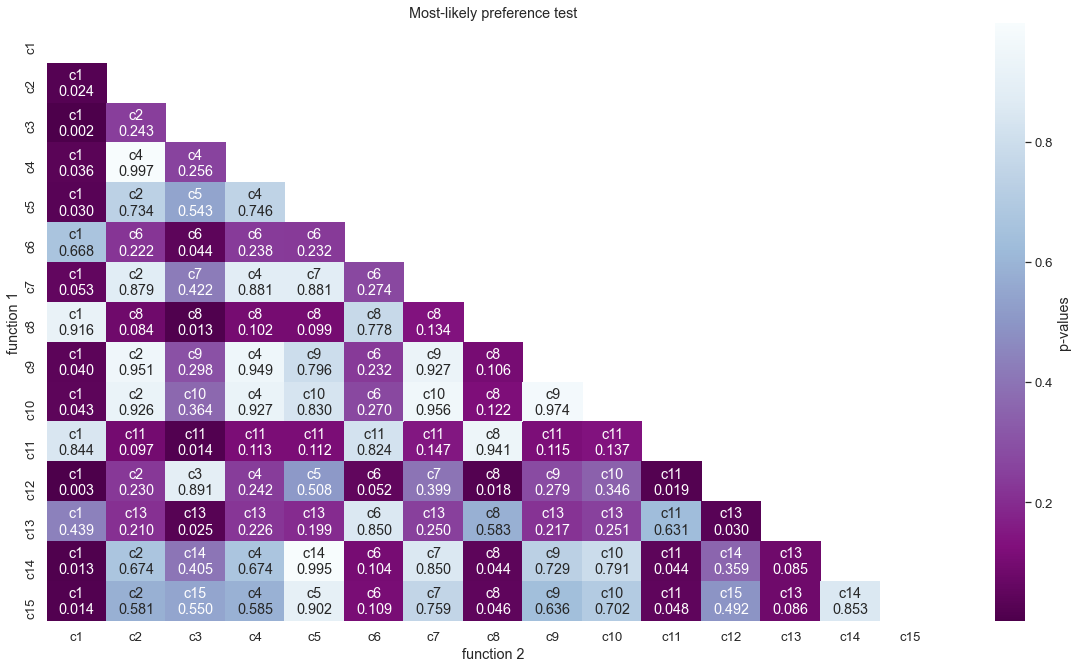

In [42]:
create_heatmap(most_likely, 'Most-likely preference test', 'most_likely')

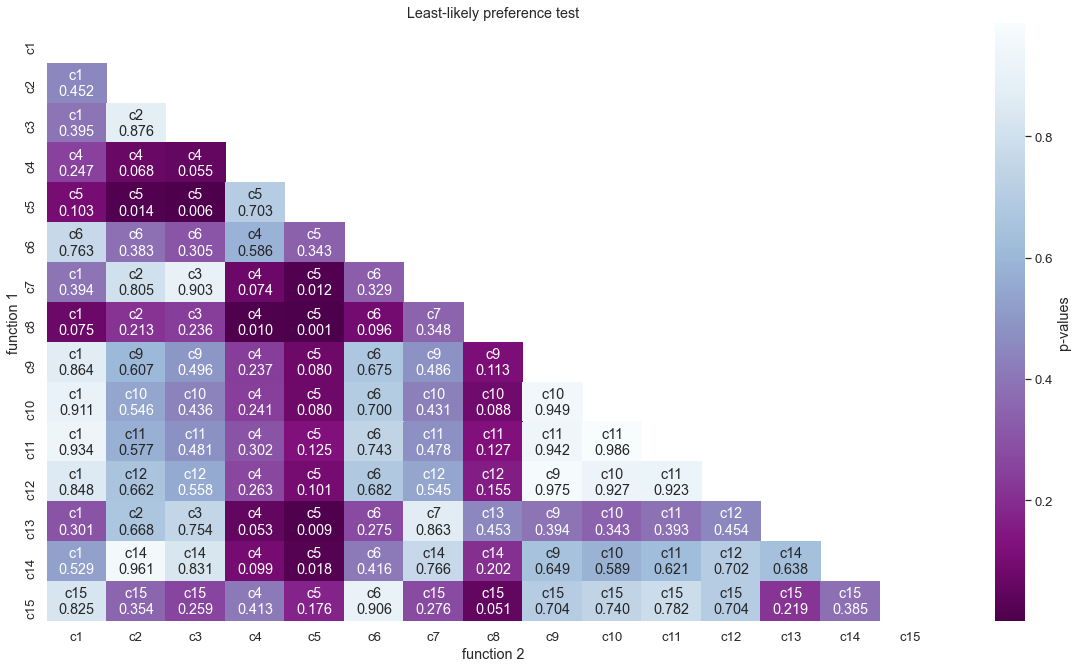

In [13]:
create_heatmap(least_likely, 'Least-likely preference test', 'least_likely')

## Grouped by scope

In [14]:
# Data import

In [15]:
scope_most_likely = pd.read_csv(os.path.join(resultpath,'2024-04-22_scope_most_likely.tsv'), 
                          delimiter = '\t', header = 0)

In [16]:
scope_least_likely = pd.read_csv(os.path.join(resultpath,'2024-04-22_scope_least_likely.tsv'), 
                          delimiter = '\t', header = 0)

In [17]:
# Remove unneeded columns

scope_most_likely.drop(columns = ['Unnamed: 0', 'mean 1', 'mean 2', 'stdev 1', 'stdev 2', 
                            't-test', 'aggregation approach', 'run-date'], inplace = True)
scope_least_likely.drop(columns = ['Unnamed: 0', 'mean 1', 'mean 2', 'stdev 1', 'stdev 2', 
                            't-test', 'aggregation approach', 'run-date'], inplace = True)

In [18]:
# Change the order of the functions if necessary to keep cells with values below the main diagonal

scope_most_likely[['function 1', 'function 2', 'p-val']] = scope_most_likely.apply(swap_functions, axis = 1)
scope_least_likely[['function 1', 'function 2', 'p-val']] = scope_least_likely.apply(swap_functions, axis = 1)

In [19]:
# Create one dataframe per scope

In [20]:
scopes = scope_most_likely['groupings'].unique()
scopes

array(['very broad', 'broad', 'very specific', 'somewhat specific'],
      dtype=object)

In [21]:
scope_most_likely_dfs = {}
for scope in scopes:
    scope_most_likely_dfs[scope] = scope_most_likely[scope_most_likely['groupings'] == 
                                                     scope].reset_index(drop=True)

In [22]:
scope_least_likely_dfs = {}
for scope in scopes:
    scope_least_likely_dfs[scope] = scope_least_likely[scope_least_likely['groupings'] == 
                                                     scope].reset_index(drop=True)

In [23]:
# Create heatmaps

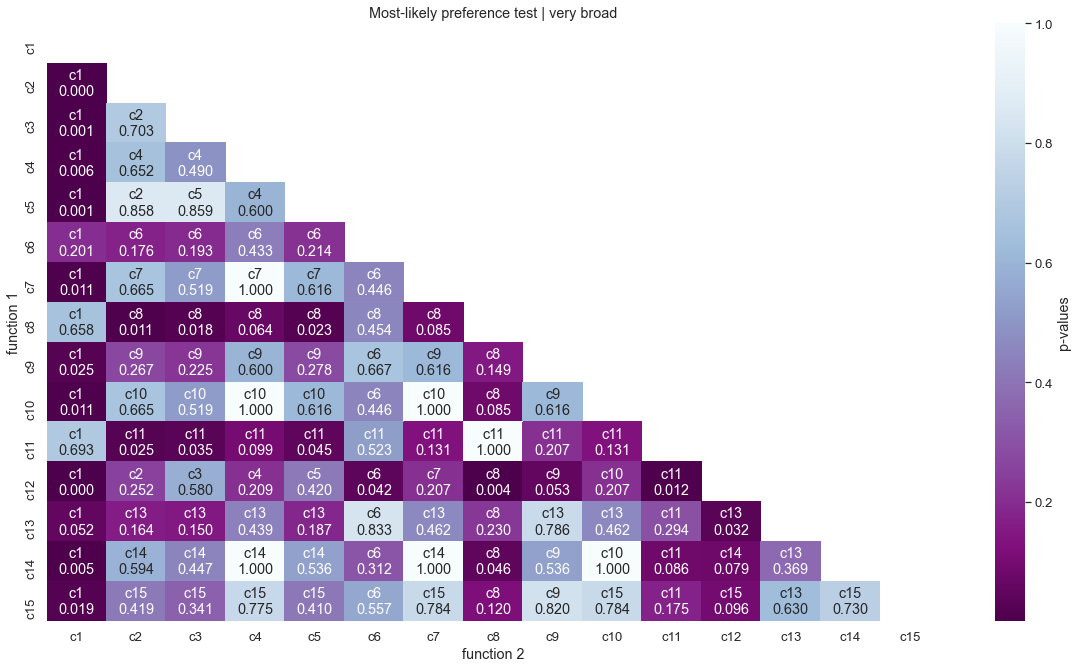

In [24]:
create_heatmap(scope_most_likely_dfs['very broad'], 
               'Most-likely preference test | very broad', 'very_broad_most_likely')

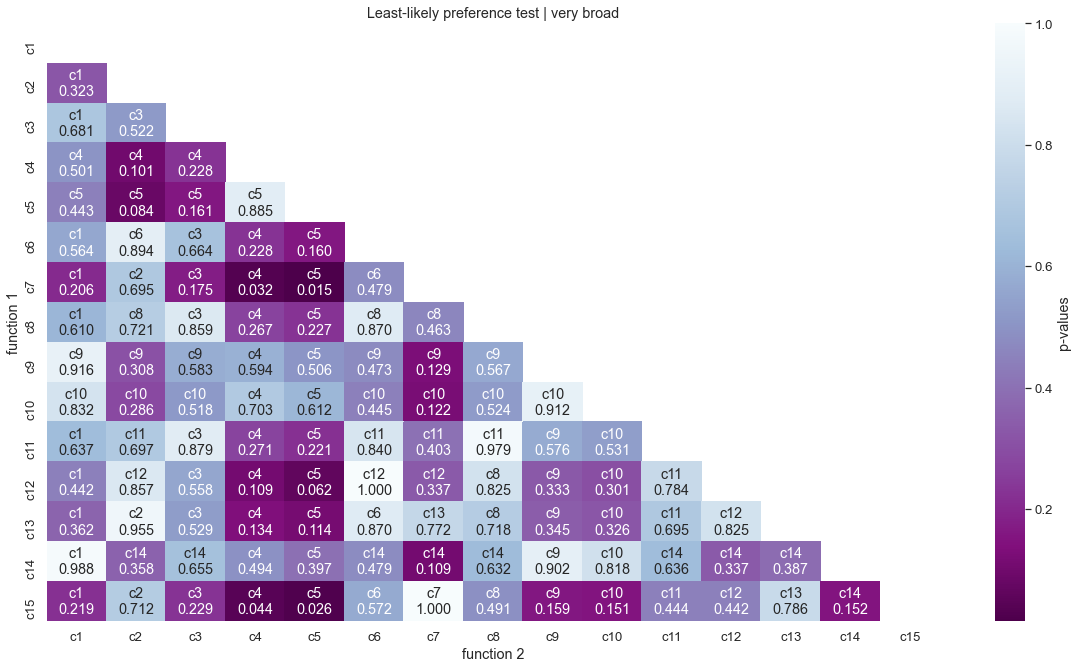

In [25]:
create_heatmap(scope_least_likely_dfs['very broad'], 
               'Least-likely preference test | very broad', 'very_broad_least_likely')

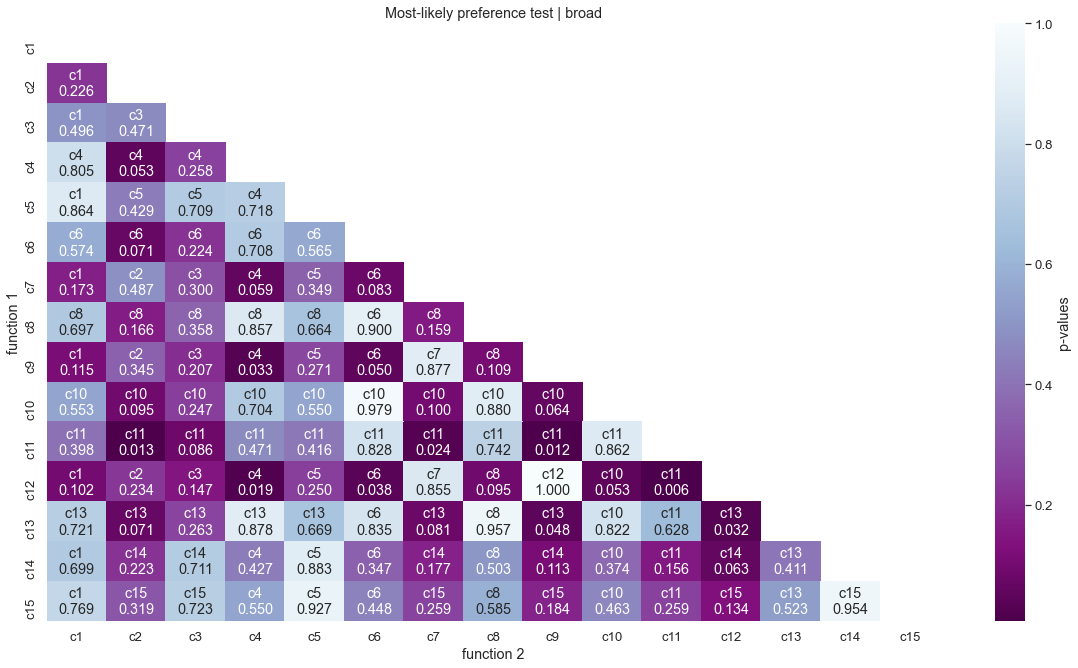

In [26]:
create_heatmap(scope_most_likely_dfs['broad'], 
               'Most-likely preference test | broad', 'broad_most_likely')

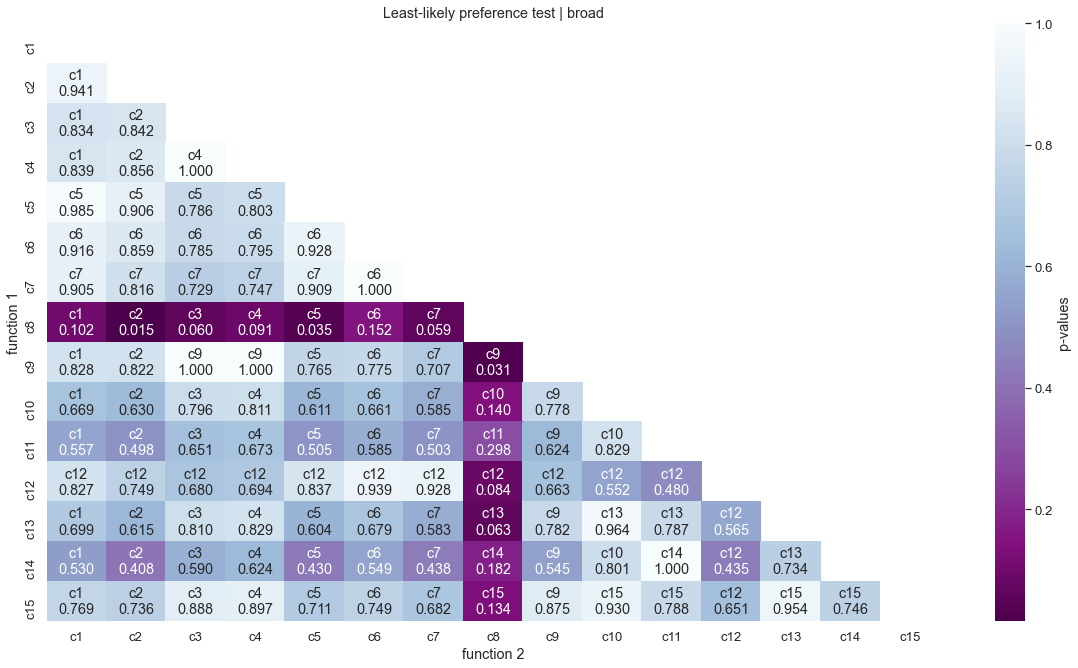

In [27]:
create_heatmap(scope_least_likely_dfs['broad'], 
               'Least-likely preference test | broad', 'broad_least_likely')

In [28]:
scope_most_likely_dfs['very specific']

function 1 function 2 winner     p-val      groupings
0          c11         c2     c2  0.580576  very specific
1           c2         c1     c2  0.778685  very specific
2          c10         c2     c2  0.266224  very specific
3           c7         c2     c7  1.000000  very specific
4           c5         c2     c2  0.826380  very specific
5          c13         c2     c2  0.552968  very specific
6          c12         c2     c2  0.697137  very specific
7          c14         c2     c2  0.209846  very specific
8           c4         c2     c2  0.117646  very specific
9           c6         c2     c2  0.436588  very specific
10          c8         c2     c2  0.270953  very specific
11          c9         c2     c2  0.436588  very specific
12         c15         c2     c2  0.270953  very specific
13          c3         c2     c2  0.137808  very specific
14         c11         c1     c1  0.690579  very specific
15         c11        c10    c11  0.717190  very specific
16         c11         c7     c7  0.670180  very specific
17         c11         c5     c5  0.752617  very specific
18         c13        c11    c13  1.000000  very specific
19         c12        c11    c12  0.898168  very specific
20         c14        c11    c11  0.558110  very specific
21         c11         c4    c11  0.352413  very specific
22         c11         c6    c11  0.788780  very specific
23         c11         c8    c11  0.536717  very specific
24         c11         c9    c11  0.788780  very specific
25         c15        c11    c11  0.536717  very specific
26         c11         c3    c11  0.348641  very specific
27         c10         c1     c1  0.344343  very specific
28          c7         c1     c7  0.824345  very specific
29          c5         c1     c5  1.000000  very specific
30         c13         c1     c1  0.675071  very specific
31         c12         c1     c1  0.828668  very specific
32         c14         c1     c1  0.254547  very specific
33          c4         c1     c1  0.143121  very specific
34          c6         c1     c1  0.514763  very specific
35          c8         c1     c1  0.295999  very specific
36          c9         c1     c1  0.514763  very specific
37         c15         c1     c1  0.295999  very specific
38          c3         c1     c1  0.152885  very specific
39         c10         c7     c7  0.370315  very specific
40         c10         c5     c5  0.434767  very specific
41         c13        c10    c13  0.680138  very specific
42         c12        c10    c12  0.556395  very specific
43         c14        c10    c10  0.715555  very specific
44         c10         c4    c10  0.407084  very specific
45         c10         c6     c6  1.000000  very specific
46         c10         c8    c10  0.556395  very specific
47         c10         c9     c9  1.000000  very specific
48         c15        c10    c10  0.556395  very specific
49         c10         c3    c10  0.340528  very specific
50          c7         c5     c7  0.865086  very specific
51         c13         c7     c7  0.643330  very specific
52         c12         c7     c7  0.766255  very specific
53         c14         c7     c7  0.315096  very specific
54          c7         c4     c7  0.203111  very specific
55          c7         c6     c7  0.550362  very specific
56          c8         c7     c7  0.400966  very specific
57          c9         c7     c7  0.550362  very specific
58         c15         c7     c7  0.400966  very specific
59          c7         c3     c7  0.237796  very specific
60         c13         c5     c5  0.732828  very specific
61         c12         c5     c5  0.858685  very specific
62         c14         c5     c5  0.346422  very specific
63          c5         c4     c5  0.214843  very specific
64          c6         c5     c5  0.589628  very specific
65          c8         c5     c5  0.396287  very specific
66          c9         c5     c5  0.589628  very specific
67         c15         c5     c5  0.396287  very specific
68

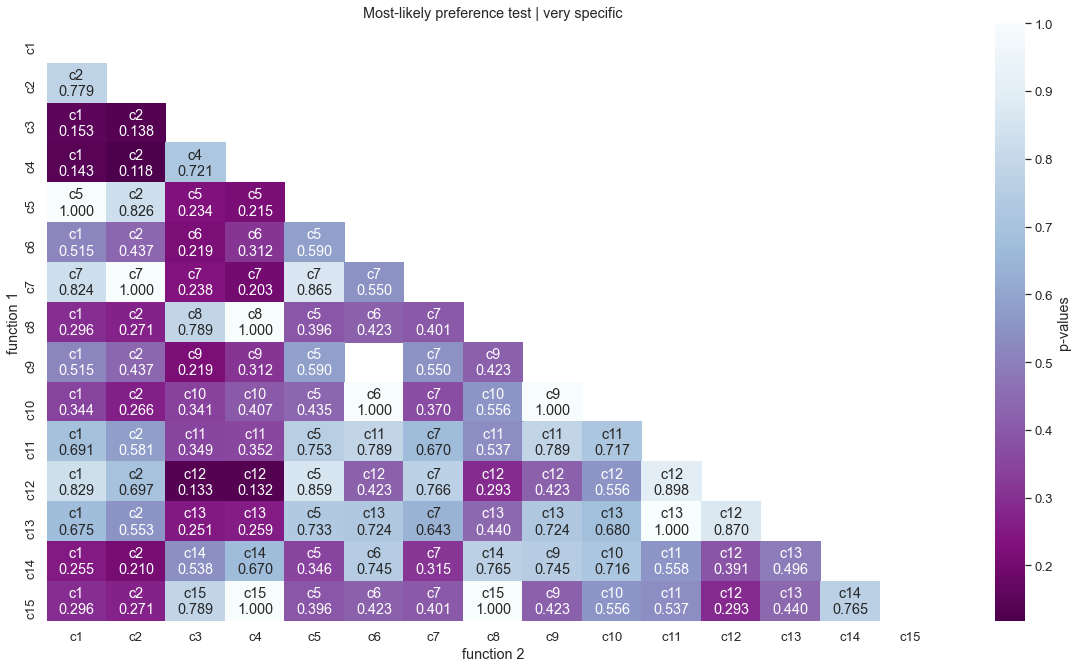

In [351]:
create_heatmap(scope_most_likely_dfs['very specific'], 
               'Most-likely preference test | very specific', 'very_specific_most_likely')

In [352]:
scope_most_likely_dfs['very specific']

function 1 function 2 winner     p-val      groupings
0          c11         c2     c2  0.580576  very specific
1           c2         c1     c2  0.778685  very specific
2          c10         c2     c2  0.266224  very specific
3           c7         c2     c7  1.000000  very specific
4           c5         c2     c2  0.826380  very specific
5          c13         c2     c2  0.552968  very specific
6          c12         c2     c2  0.697137  very specific
7          c14         c2     c2  0.209846  very specific
8           c4         c2     c2  0.117646  very specific
9           c6         c2     c2  0.436588  very specific
10          c8         c2     c2  0.270953  very specific
11          c9         c2     c2  0.436588  very specific
12         c15         c2     c2  0.270953  very specific
13          c3         c2     c2  0.137808  very specific
14         c11         c1     c1  0.690579  very specific
15         c11        c10    c11  0.717190  very specific
16         c11         c7     c7  0.670180  very specific
17         c11         c5     c5  0.752617  very specific
18         c13        c11    c13  1.000000  very specific
19         c12        c11    c12  0.898168  very specific
20         c14        c11    c11  0.558110  very specific
21         c11         c4    c11  0.352413  very specific
22         c11         c6    c11  0.788780  very specific
23         c11         c8    c11  0.536717  very specific
24         c11         c9    c11  0.788780  very specific
25         c15        c11    c11  0.536717  very specific
26         c11         c3    c11  0.348641  very specific
27         c10         c1     c1  0.344343  very specific
28          c7         c1     c7  0.824345  very specific
29          c5         c1     c5  1.000000  very specific
30         c13         c1     c1  0.675071  very specific
31         c12         c1     c1  0.828668  very specific
32         c14         c1     c1  0.254547  very specific
33          c4         c1     c1  0.143121  very specific
34          c6         c1     c1  0.514763  very specific
35          c8         c1     c1  0.295999  very specific
36          c9         c1     c1  0.514763  very specific
37         c15         c1     c1  0.295999  very specific
38          c3         c1     c1  0.152885  very specific
39         c10         c7     c7  0.370315  very specific
40         c10         c5     c5  0.434767  very specific
41         c13        c10    c13  0.680138  very specific
42         c12        c10    c12  0.556395  very specific
43         c14        c10    c10  0.715555  very specific
44         c10         c4    c10  0.407084  very specific
45         c10         c6     c6  1.000000  very specific
46         c10         c8    c10  0.556395  very specific
47         c10         c9     c9  1.000000  very specific
48         c15        c10    c10  0.556395  very specific
49         c10         c3    c10  0.340528  very specific
50          c7         c5     c7  0.865086  very specific
51         c13         c7     c7  0.643330  very specific
52         c12         c7     c7  0.766255  very specific
53         c14         c7     c7  0.315096  very specific
54          c7         c4     c7  0.203111  very specific
55          c7         c6     c7  0.550362  very specific
56          c8         c7     c7  0.400966  very specific
57          c9         c7     c7  0.550362  very specific
58         c15         c7     c7  0.400966  very specific
59          c7         c3     c7  0.237796  very specific
60         c13         c5     c5  0.732828  very specific
61         c12         c5     c5  0.858685  very specific
62         c14         c5     c5  0.346422  very specific
63          c5         c4     c5  0.214843  very specific
64          c6         c5     c5  0.589628  very specific
65          c8         c5     c5  0.396287  very specific
66          c9         c5     c5  0.589628  very specific
67         c15         c5     c5  0.396287  very specific
68

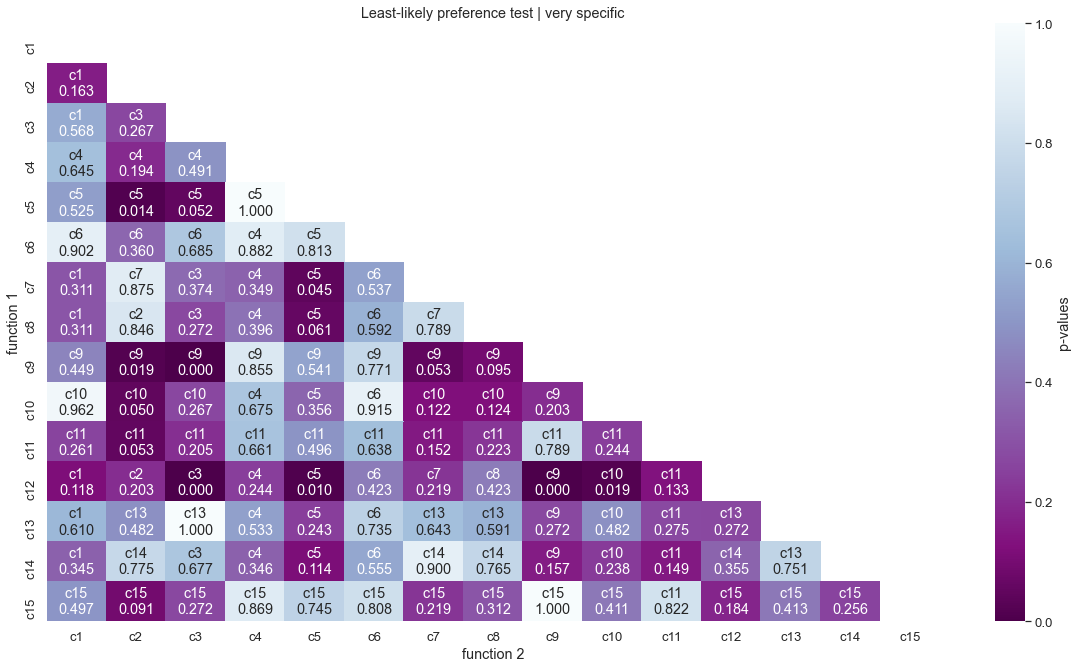

In [353]:
create_heatmap(scope_least_likely_dfs['very specific'], 
               'Least-likely preference test | very specific', 'very_specific_least_likely')

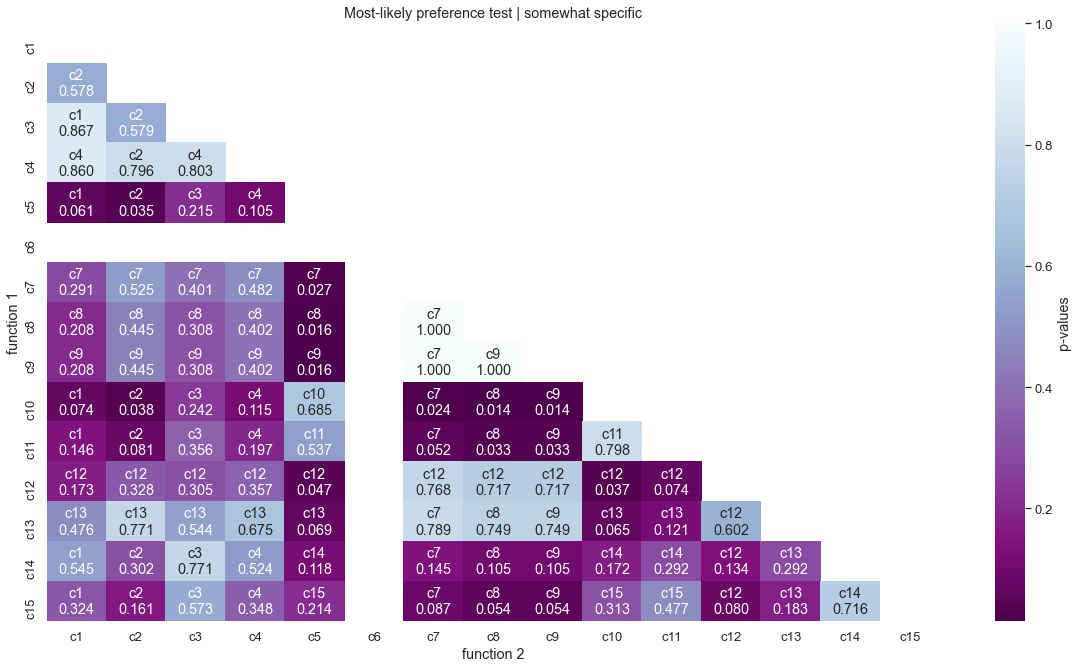

In [354]:
create_heatmap(scope_most_likely_dfs['somewhat specific'], 
               'Most-likely preference test | somewhat specific', 'somewhat_specific_most_likely')

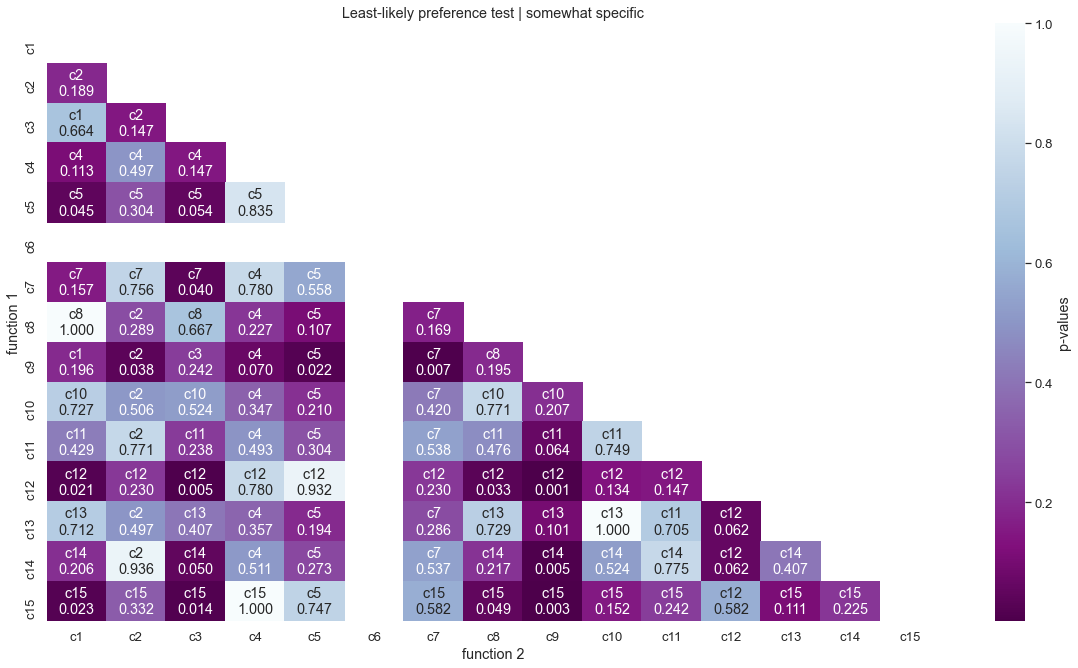

In [355]:
create_heatmap(scope_least_likely_dfs['somewhat specific'], 
               'Least-likely preference test | somewhat specific', 'somewhat_specific_least_likely')

In [356]:
scope_most_likely_dfs['somewhat specific']

function 1 function 2 winner     p-val          groupings
0           c3         c1     c1  0.867214  somewhat specific
1           c4         c1     c4  0.859541  somewhat specific
2           c8         c1     c8  0.208087  somewhat specific
3           c9         c1     c9  0.208087  somewhat specific
4           c7         c1     c7  0.290781  somewhat specific
5          c12         c1    c12  0.173038  somewhat specific
6          c13         c1    c13  0.476429  somewhat specific
7           c2         c1     c2  0.577707  somewhat specific
8           c5         c1     c1  0.061045  somewhat specific
9          c10         c1     c1  0.074027  somewhat specific
10         c15         c1     c1  0.323839  somewhat specific
11         c11         c1     c1  0.146426  somewhat specific
12         c14         c1     c1  0.545079  somewhat specific
13          c6         c1     c1       NaN  somewhat specific
14          c4         c3     c4  0.802772  somewhat specific
15          c8         c3     c8  0.308008  somewhat specific
16          c9         c3     c9  0.308008  somewhat specific
17          c7         c3     c7  0.400572  somewhat specific
18         c12         c3    c12  0.304521  somewhat specific
19         c13         c3    c13  0.543597  somewhat specific
20          c3         c2     c2  0.579367  somewhat specific
21          c5         c3     c3  0.214916  somewhat specific
22         c10         c3     c3  0.241504  somewhat specific
23         c15         c3     c3  0.572735  somewhat specific
24         c11         c3     c3  0.355820  somewhat specific
25         c14         c3     c3  0.770713  somewhat specific
26          c6         c3     c3       NaN  somewhat specific
27          c8         c4     c8  0.402149  somewhat specific
28          c9         c4     c9  0.402149  somewhat specific
29          c7         c4     c7  0.481618  somewhat specific
30         c12         c4    c12  0.357431  somewhat specific
31         c13         c4    c13  0.674845  somewhat specific
32          c4         c2     c2  0.796487  somewhat specific
33          c5         c4     c4  0.105298  somewhat specific
34         c10         c4     c4  0.115077  somewhat specific
35         c15         c4     c4  0.347799  somewhat specific
36         c11         c4     c4  0.197022  somewhat specific
37         c14         c4     c4  0.523742  somewhat specific
38          c6         c4     c4       NaN  somewhat specific
39          c9         c8     c9  1.000000  somewhat specific
40          c8         c7     c7  1.000000  somewhat specific
41         c12         c8    c12  0.717190  somewhat specific
42         c13         c8     c8  0.748645  somewhat specific
43          c8         c2     c8  0.445116  somewhat specific
44          c8         c5     c8  0.015776  somewhat specific
45         c10         c8     c8  0.013850  somewhat specific
46         c15         c8     c8  0.054344  somewhat specific
47         c11         c8     c8  0.033146  somewhat specific
48         c14         c8     c8  0.105322  somewhat specific
49          c8         c6     c8       NaN  somewhat specific
50          c9         c7     c7  1.000000  somewhat specific
51         c12         c9    c12  0.717190  somewhat specific
52         c13         c9     c9  0.748645  somewhat specific
53          c9         c2     c9  0.445116  somewhat specific
54          c9         c5     c9  0.015776  somewhat specific
55         c10         c9     c9  0.013850  somewhat specific
56         c15         c9     c9  0.054344  somewhat specific
57         c11         c9     c9  0.033146  somewhat specific
58         c14         c9     c9  0.105322  somewhat specific
59          c9         c6     c9       NaN  somewhat specific
60         c12         c7    c12  0.767644  somewhat specific
61         c13         c7     c7  0.789447  somewhat specific
62          c7         c2     c7  0.524545  somewhat specific
63          c7         c5     c7  0.

## Grouped by domain

In [357]:
# Data import

In [358]:
domain_most_likely = pd.read_csv(os.path.join(resultpath,'2024-04-22_domain_most_likely.tsv'), 
                          delimiter = '\t', header = 0)

In [359]:
domain_least_likely = pd.read_csv(os.path.join(resultpath,'2024-04-22_domain_least_likely.tsv'), 
                          delimiter = '\t', header = 0)

In [360]:
# Remove unneeded columns

domain_most_likely.drop(columns = ['Unnamed: 0', 'mean 1', 'mean 2', 'stdev 1', 'stdev 2', 
                            't-test', 'aggregation approach', 'run-date'], inplace = True)
domain_least_likely.drop(columns = ['Unnamed: 0', 'mean 1', 'mean 2', 'stdev 1', 'stdev 2', 
                            't-test', 'aggregation approach', 'run-date'], inplace = True)

In [361]:
# Change the order of the functions if necessary to keep cells with values below the main diagonal

domain_most_likely[['function 1', 'function 2', 'p-val']] = domain_most_likely.apply(swap_functions, axis = 1)
domain_least_likely[['function 1', 'function 2', 'p-val']] = domain_least_likely.apply(swap_functions, axis = 1)

In [362]:
# Create one dataframe per scope

In [363]:
domains = domain_most_likely['groupings'].unique()
domains

array(['Infectious Disease', 'Allergy', 'Immunology',
       'General Biomedical', 'Cell types', 'Experimental techniques'],
      dtype=object)

In [364]:
domain_most_likely_dfs = {}
for domain in domains:
    domain_most_likely_dfs[domain] = domain_most_likely[domain_most_likely['groupings'] == 
                                                     domain].reset_index(drop=True)

In [365]:
domain_least_likely_dfs = {}
for domain in domains:
    domain_least_likely_dfs[domain] = domain_least_likely[domain_least_likely['groupings'] == 
                                                     domain].reset_index(drop=True)

In [366]:
# Create heatmaps

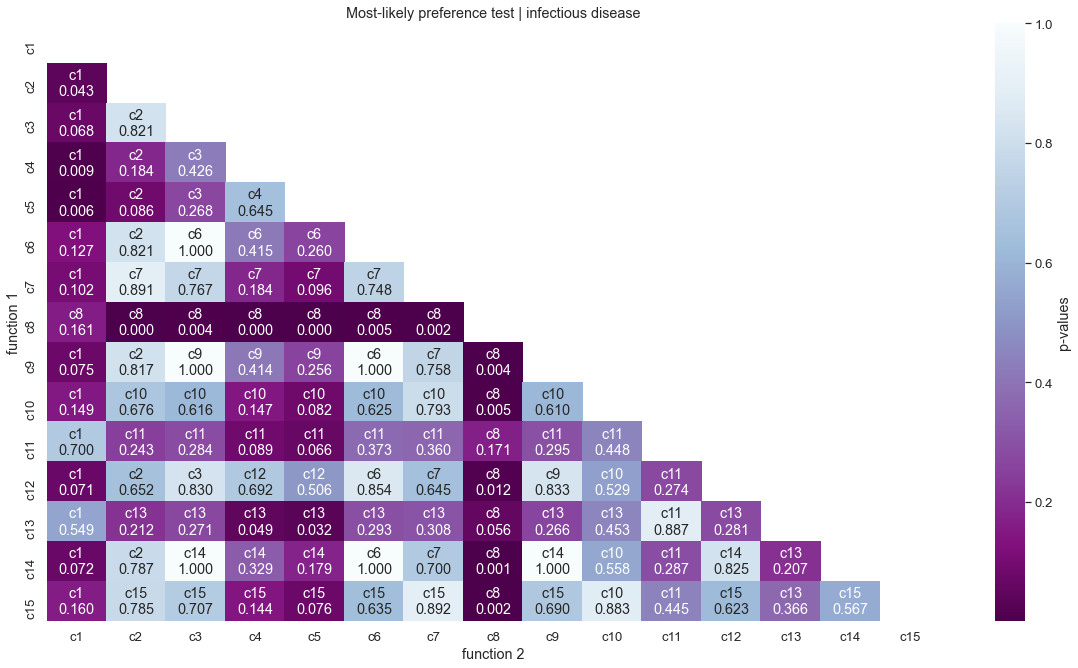

In [367]:
create_heatmap(domain_most_likely_dfs['Infectious Disease'], 
               'Most-likely preference test | infectious disease', 'infectious_disease_most_likely')

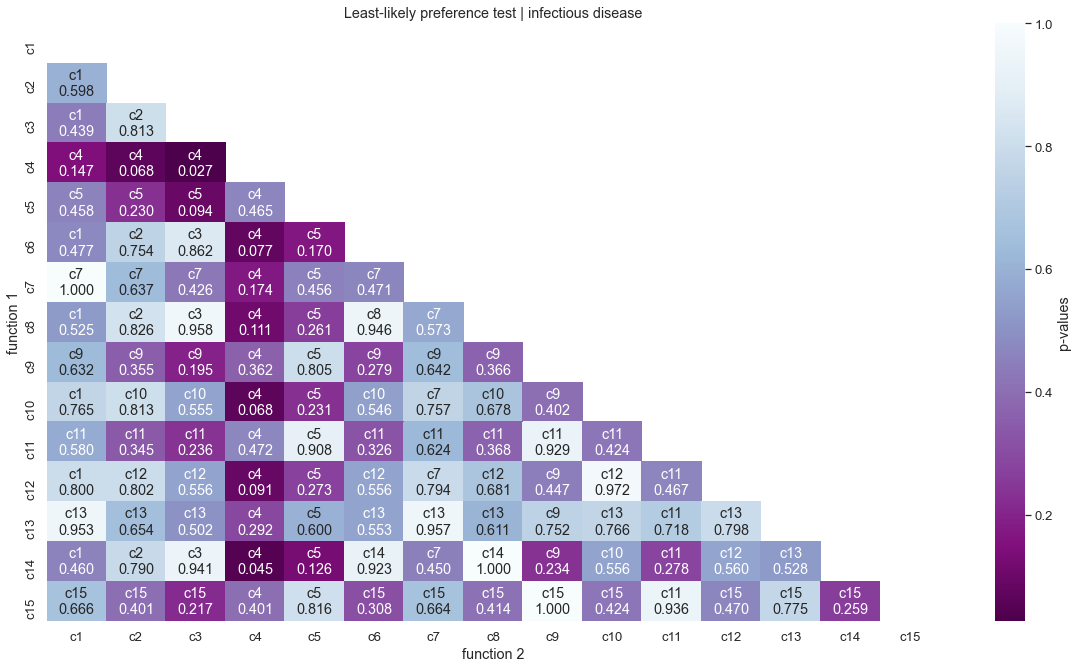

In [368]:
create_heatmap(domain_least_likely_dfs['Infectious Disease'], 
               'Least-likely preference test | infectious disease', 'infectious_disease_least_likely')

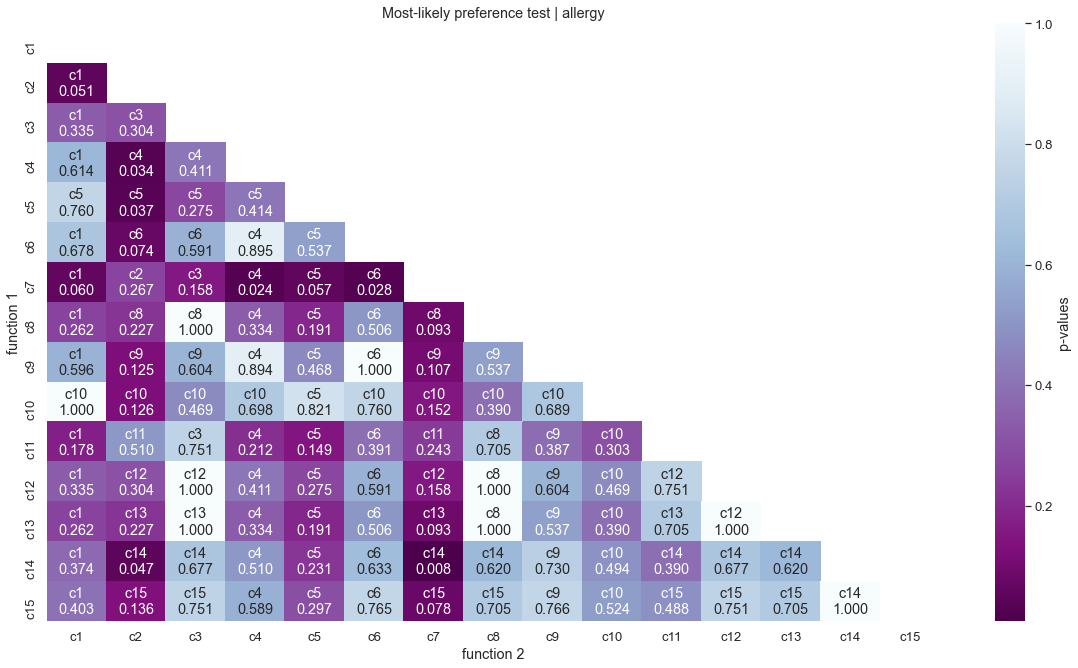

In [369]:
create_heatmap(domain_most_likely_dfs['Allergy'], 
               'Most-likely preference test | allergy', 'allergy_most_likely')

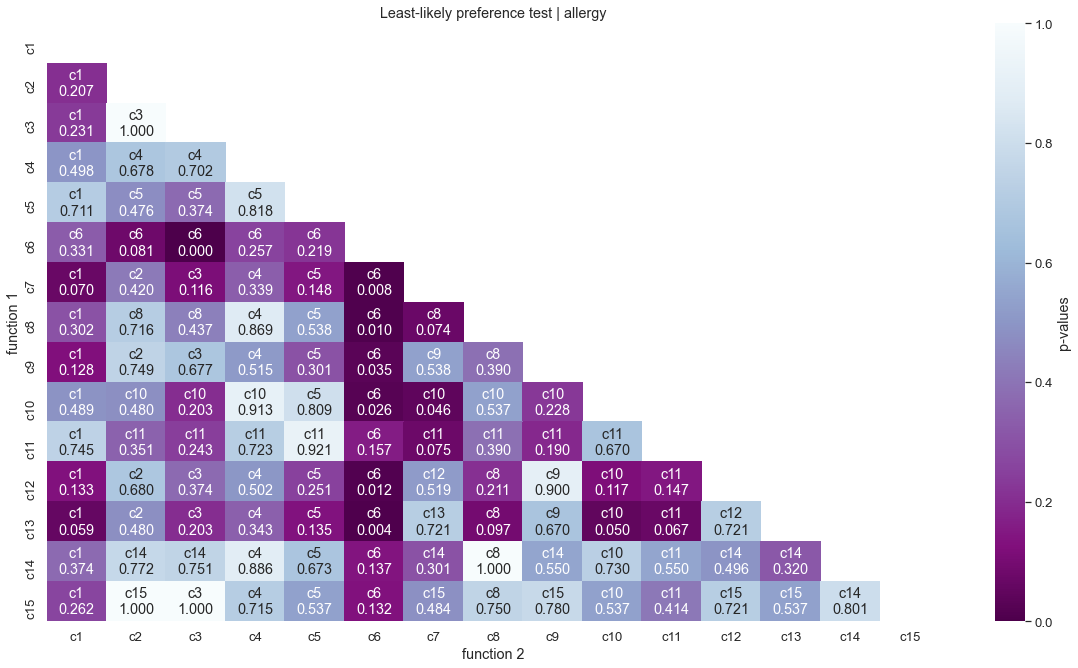

In [370]:
create_heatmap(domain_least_likely_dfs['Allergy'], 
               'Least-likely preference test | allergy', 'allergy_least_likely')

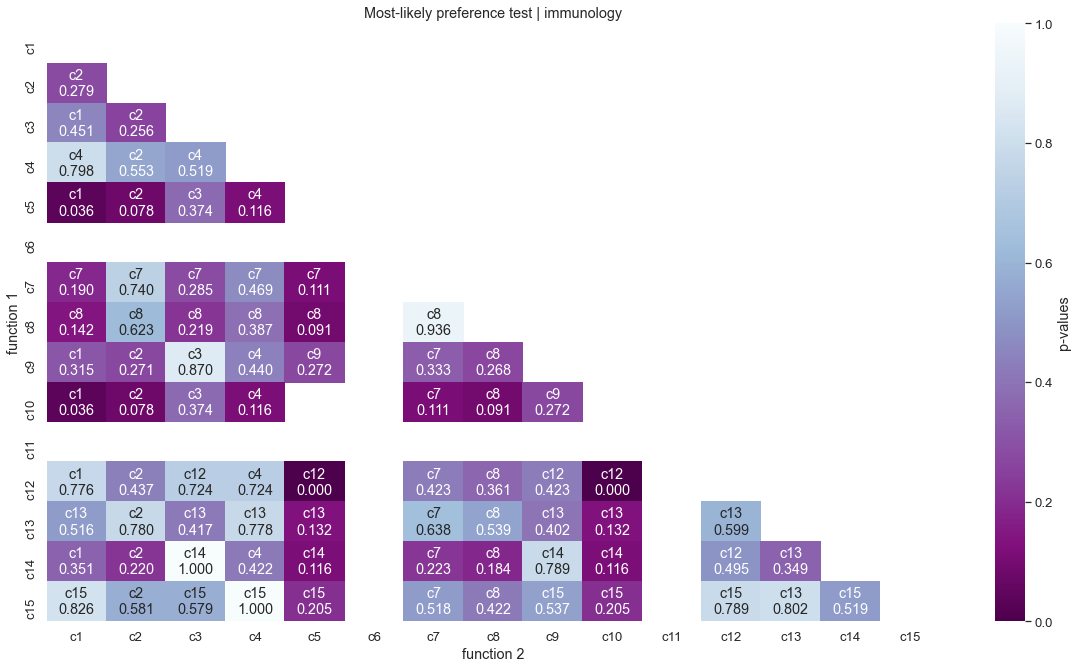

In [371]:
create_heatmap(domain_most_likely_dfs['Immunology'], 
               'Most-likely preference test | immunology', 'immunology_most_likely')

In [372]:
domain_most_likely_dfs['Immunology']

function 1 function 2 winner     p-val   groupings
0           c4         c1     c4  0.797972  Immunology
1           c4         c3     c4  0.518519  Immunology
2           c4         c2     c2  0.552968  Immunology
3           c6         c4     c6       NaN  Immunology
4           c7         c4     c7  0.468938  Immunology
5           c8         c4     c8  0.386912  Immunology
6          c11         c4    c11       NaN  Immunology
7          c13         c4    c13  0.778050  Immunology
8          c15         c4    c15  1.000000  Immunology
9           c5         c4     c4  0.116117  Immunology
10         c12         c4     c4  0.724377  Immunology
11         c14         c4     c4  0.421648  Immunology
12         c10         c4     c4  0.116117  Immunology
13          c9         c4     c4  0.439710  Immunology
14          c3         c1     c1  0.451239  Immunology
15          c2         c1     c2  0.278814  Immunology
16          c6         c1     c6       NaN  Immunology
17          c7         c1     c7  0.190116  Immunology
18          c8         c1     c8  0.141892  Immunology
19         c11         c1    c11       NaN  Immunology
20         c13         c1    c13  0.516490  Immunology
21         c15         c1    c15  0.826380  Immunology
22          c5         c1     c1  0.035770  Immunology
23         c12         c1     c1  0.776448  Immunology
24         c14         c1     c1  0.350617  Immunology
25         c10         c1     c1  0.035770  Immunology
26          c9         c1     c1  0.315334  Immunology
27          c3         c2     c2  0.255618  Immunology
28          c6         c3     c6       NaN  Immunology
29          c7         c3     c7  0.284656  Immunology
30          c8         c3     c8  0.219307  Immunology
31         c11         c3    c11       NaN  Immunology
32         c13         c3    c13  0.416866  Immunology
33         c15         c3    c15  0.579015  Immunology
34          c5         c3     c3  0.373901  Immunology
35         c12         c3    c12  0.724377  Immunology
36         c14         c3    c14  1.000000  Immunology
37         c10         c3     c3  0.373901  Immunology
38          c9         c3     c3  0.870276  Immunology
39          c6         c2     c6       NaN  Immunology
40          c7         c2     c7  0.739942  Immunology
41          c8         c2     c8  0.623293  Immunology
42         c11         c2    c11       NaN  Immunology
43         c13         c2     c2  0.780166  Immunology
44         c15         c2     c2  0.580576  Immunology
45          c5         c2     c2  0.078141  Immunology
46         c12         c2     c2  0.436588  Immunology
47         c14         c2     c2  0.219944  Immunology
48         c10         c2     c2  0.078141  Immunology
49          c9         c2     c2  0.270953  Immunology
50          c7         c6     c7       NaN  Immunology
51          c8         c6     c8       NaN  Immunology
52         c11         c6    c11       NaN  Immunology
53         c13         c6     c6       NaN  Immunology
54         c15         c6     c6       NaN  Immunology
55          c6         c5     c6       NaN  Immunology
56         c12         c6     c6       NaN  Immunology
57         c14         c6     c6       NaN  Immunology
58         c10         c6     c6       NaN  Immunology
59          c9         c6     c6       NaN  Immunology
60          c8         c7     c8  0.936044  Immunology
61         c11         c7    c11       NaN  Immunology
62         c13         c7     c7  0.637618  Immunology
63         c15         c7     c7  0.517632  Immunology
64          c7         c5     c7  0.111367  Immunology
65         c12         c7     c7  0.422650  Immunology
66         c14         c7     c7  0.223427  Immunology
67         c10         c7     c7  0.111367  Immunology
68          c9         c7     c7  0.333333  Immunology
69         c11         c8    c11       NaN  Immunology
70         c13         c8     c8  0.539080  Immunology
71         c15         c8     c8  0.421648  

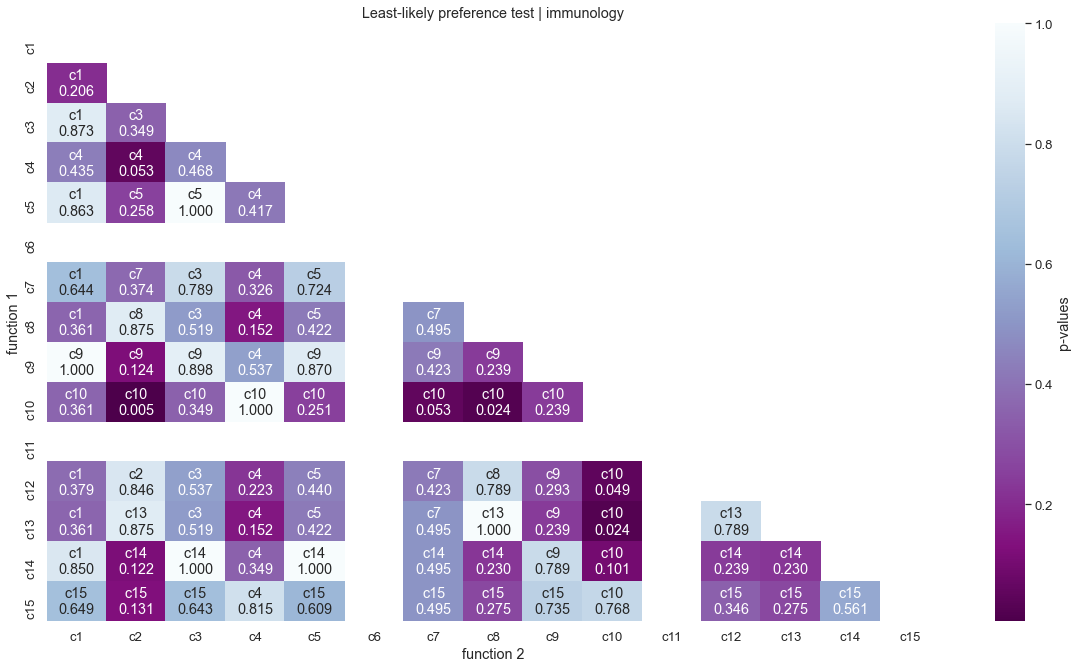

In [373]:
create_heatmap(domain_least_likely_dfs['Immunology'], 
               'Least-likely preference test | immunology', 'immunology_least_likely')

In [374]:
domain_least_likely_dfs['Immunology']

function 1 function 2 winner     p-val   groupings
0          c15         c4     c4  0.814902  Immunology
1           c4         c3     c4  0.467605  Immunology
2           c5         c4     c4  0.416866  Immunology
3          c10         c4    c10  1.000000  Immunology
4          c14         c4     c4  0.348641  Immunology
5           c4         c1     c4  0.434767  Immunology
6           c4         c2     c4  0.053274  Immunology
7           c7         c4     c4  0.326121  Immunology
8           c8         c4     c4  0.151835  Immunology
9           c9         c4     c4  0.536717  Immunology
10         c13         c4     c4  0.151835  Immunology
11         c12         c4     c4  0.223427  Immunology
12          c6         c4     c4       NaN  Immunology
13         c11         c4     c4       NaN  Immunology
14         c15         c3    c15  0.643330  Immunology
15         c15         c5    c15  0.608653  Immunology
16         c15        c10    c10  0.767644  Immunology
17         c15        c14    c15  0.561438  Immunology
18         c15         c1    c15  0.649120  Immunology
19         c15         c2    c15  0.130691  Immunology
20         c15         c7    c15  0.495025  Immunology
21         c15         c8    c15  0.274577  Immunology
22         c15         c9    c15  0.734546  Immunology
23         c15        c13    c15  0.274577  Immunology
24         c15        c12    c15  0.345646  Immunology
25         c15         c6    c15       NaN  Immunology
26         c15        c11    c15       NaN  Immunology
27          c5         c3     c5  1.000000  Immunology
28         c10         c3    c10  0.348641  Immunology
29         c14         c3    c14  1.000000  Immunology
30          c3         c1     c1  0.873090  Immunology
31          c3         c2     c3  0.349052  Immunology
32          c7         c3     c3  0.788780  Immunology
33          c8         c3     c3  0.518519  Immunology
34          c9         c3     c9  0.898168  Immunology
35         c13         c3     c3  0.518519  Immunology
36         c12         c3     c3  0.536717  Immunology
37          c6         c3     c3       NaN  Immunology
38         c11         c3     c3       NaN  Immunology
39         c10         c5    c10  0.250815  Immunology
40         c14         c5    c14  1.000000  Immunology
41          c5         c1     c1  0.863172  Immunology
42          c5         c2     c5  0.257550  Immunology
43          c7         c5     c5  0.724377  Immunology
44          c8         c5     c5  0.421648  Immunology
45          c9         c5     c9  0.870276  Immunology
46         c13         c5     c5  0.421648  Immunology
47         c12         c5     c5  0.439710  Immunology
48          c6         c5     c5       NaN  Immunology
49         c11         c5     c5       NaN  Immunology
50         c14        c10    c10  0.101192  Immunology
51         c10         c1    c10  0.360703  Immunology
52         c10         c2    c10  0.005349  Immunology
53         c10         c7    c10  0.053363  Immunology
54         c10         c8    c10  0.024110  Immunology
55         c10         c9    c10  0.239443  Immunology
56         c13        c10    c10  0.024110  Immunology
57         c12        c10    c10  0.048567  Immunology
58         c10         c6    c10       NaN  Immunology
59         c11        c10    c10       NaN  Immunology
60         c14         c1     c1  0.850495  Immunology
61         c14         c2    c14  0.121902  Immunology
62         c14         c7    c14  0.495025  Immunology
63         c14         c8    c14  0.230200  Immunology
64         c14         c9     c9  0.788780  Immunology
65         c14        c13    c14  0.230200  Immunology
66         c14        c12    c14  0.239443  Immunology
67         c14         c6    c14       NaN  Immunology
68         c14        c11    c14       NaN  Immunology
69          c2         c1     c1  0.205968  Immunology
70          c7         c1     c1  0.643762  Immunology
71          c8         c1     c1  0.360703  

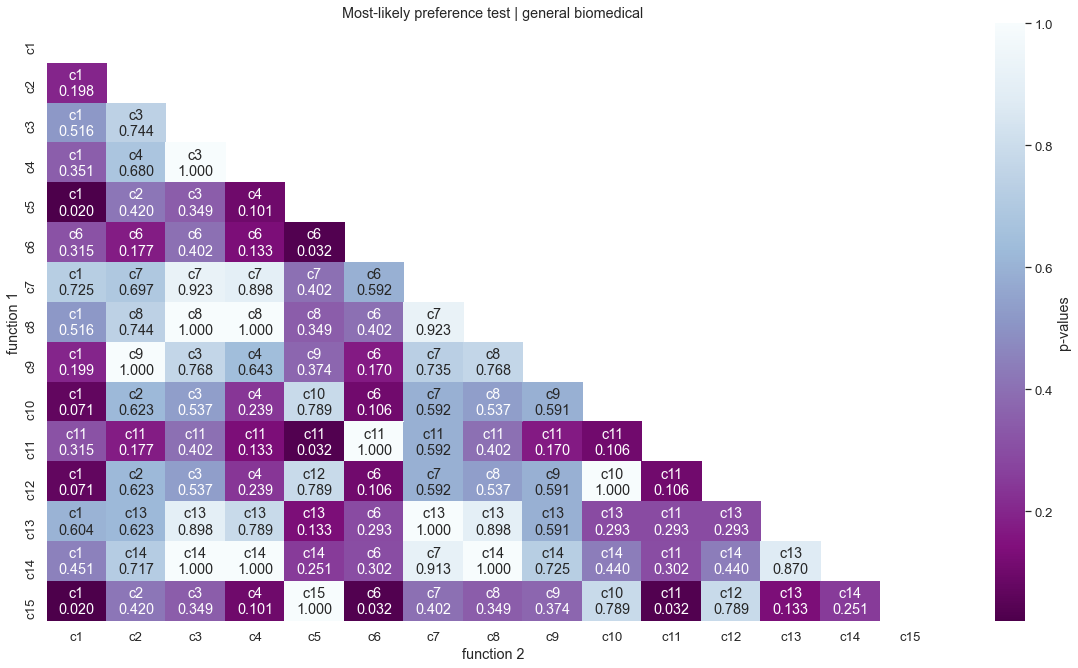

In [375]:
create_heatmap(domain_most_likely_dfs['General Biomedical'], 
               'Most-likely preference test | general biomedical', 'general_biomedical_most_likely')

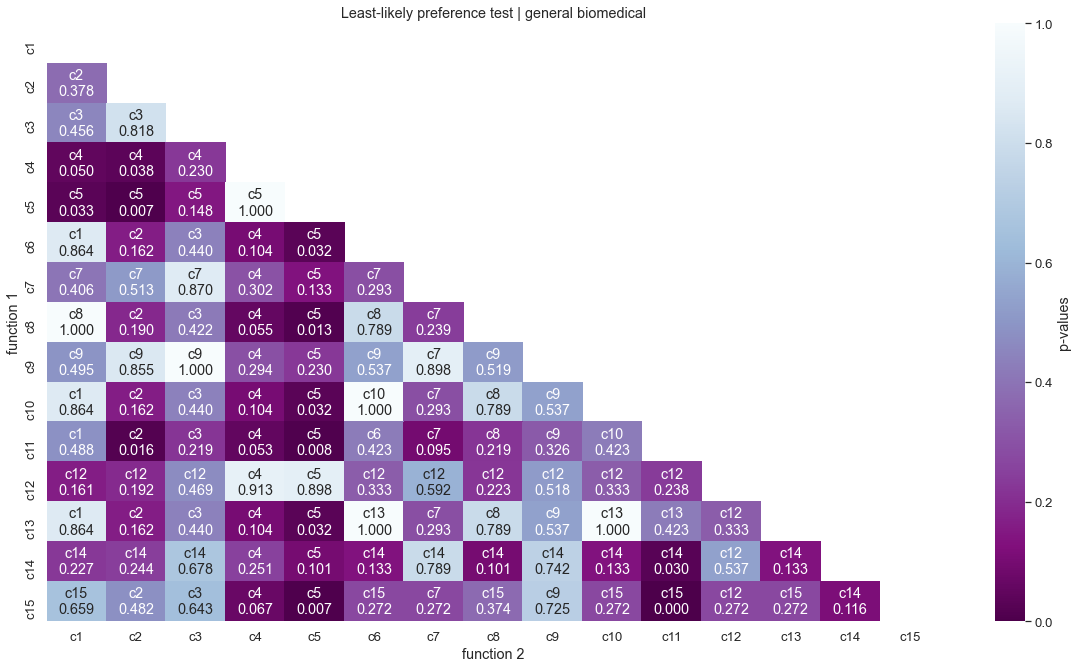

In [376]:
create_heatmap(domain_least_likely_dfs['General Biomedical'], 
               'Least-likely preference test | general biomedical', 'general_biomedical_least_likely')

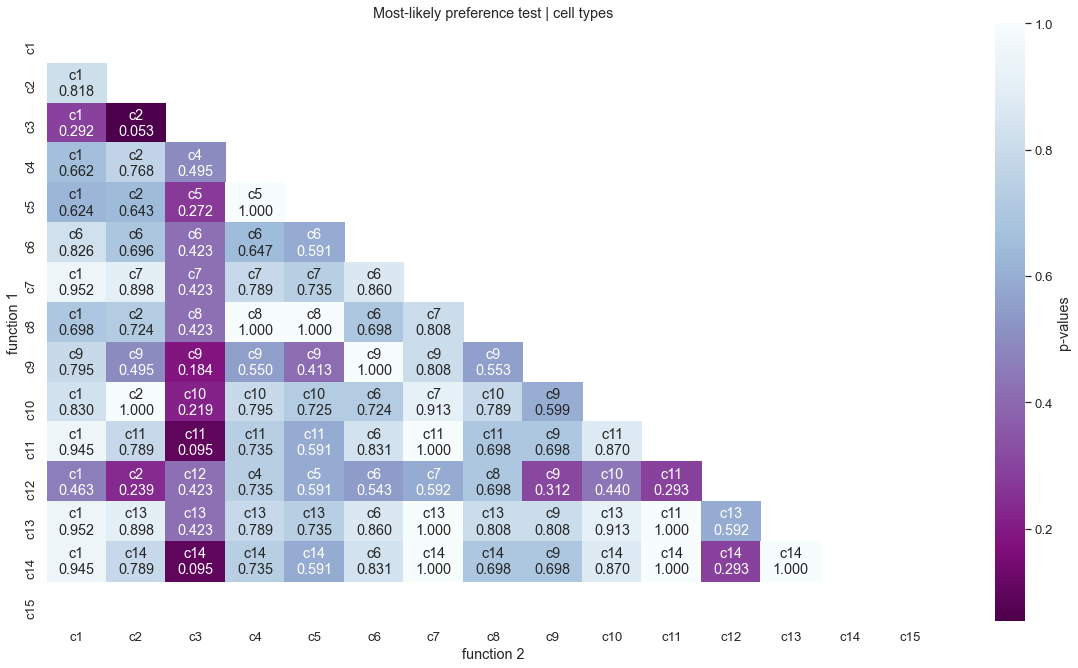

In [377]:
create_heatmap(domain_most_likely_dfs['Cell types'], 
               'Most-likely preference test | cell types', 'cell_types_most_likely')

In [378]:
domain_most_likely_dfs['Cell types']

function 1 function 2 winner     p-val   groupings
0          c10         c1     c1  0.829785  Cell types
1           c4         c1     c1  0.662203  Cell types
2           c6         c1     c6  0.825601  Cell types
3           c7         c1     c1  0.951809  Cell types
4           c9         c1     c9  0.794895  Cell types
5          c13         c1     c1  0.951809  Cell types
6           c2         c1     c1  0.818177  Cell types
7           c5         c1     c1  0.624189  Cell types
8           c8         c1     c1  0.697884  Cell types
9          c11         c1     c1  0.945237  Cell types
10         c14         c1     c1  0.945237  Cell types
11          c3         c1     c1  0.292176  Cell types
12         c12         c1     c1  0.463052  Cell types
13         c15         c1     c1       NaN  Cell types
14         c10         c4    c10  0.795255  Cell types
15         c10         c6     c6  0.724377  Cell types
16         c10         c7     c7  0.913434  Cell types
17         c10         c9     c9  0.599319  Cell types
18         c13        c10    c13  0.913434  Cell types
19         c10         c2     c2  1.000000  Cell types
20         c10         c5    c10  0.724659  Cell types
21         c10         c8    c10  0.788780  Cell types
22         c11        c10    c11  0.870276  Cell types
23         c14        c10    c14  0.870276  Cell types
24         c10         c3    c10  0.219102  Cell types
25         c12        c10    c10  0.439710  Cell types
26         c15        c10    c10       NaN  Cell types
27          c6         c4     c6  0.647015  Cell types
28          c7         c4     c7  0.788780  Cell types
29          c9         c4     c9  0.550362  Cell types
30         c13         c4    c13  0.788780  Cell types
31          c4         c2     c2  0.767644  Cell types
32          c5         c4     c5  1.000000  Cell types
33          c8         c4     c8  1.000000  Cell types
34         c11         c4    c11  0.734546  Cell types
35         c14         c4    c14  0.734546  Cell types
36          c4         c3     c4  0.495025  Cell types
37         c12         c4     c4  0.734546  Cell types
38         c15         c4     c4       NaN  Cell types
39          c7         c6     c6  0.859972  Cell types
40          c9         c6     c9  1.000000  Cell types
41         c13         c6     c6  0.859972  Cell types
42          c6         c2     c6  0.696428  Cell types
43          c6         c5     c6  0.590801  Cell types
44          c8         c6     c6  0.698489  Cell types
45         c11         c6     c6  0.830969  Cell types
46         c14         c6     c6  0.830969  Cell types
47          c6         c3     c6  0.422650  Cell types
48         c12         c6     c6  0.542504  Cell types
49         c15         c6     c6       NaN  Cell types
50          c9         c7     c9  0.807550  Cell types
51         c13         c7    c13  1.000000  Cell types
52          c7         c2     c7  0.898168  Cell types
53          c7         c5     c7  0.734546  Cell types
54          c8         c7     c7  0.807550  Cell types
55         c11         c7    c11  1.000000  Cell types
56         c14         c7    c14  1.000000  Cell types
57          c7         c3     c7  0.422650  Cell types
58         c12         c7     c7  0.591752  Cell types
59         c15         c7     c7       NaN  Cell types
60         c13         c9     c9  0.807550  Cell types
61          c9         c2     c9  0.495025  Cell types
62          c9         c5     c9  0.412770  Cell types
63          c9         c8     c9  0.552786  Cell types
64         c11         c9     c9  0.698489  Cell types
65         c14         c9     c9  0.698489  Cell types
66          c9         c3     c9  0.183503  Cell types
67         c12         c9     c9  0.311753  Cell types
68         c15         c9     c9       NaN  Cell types
69         c13         c2    c13  0.898168  Cell types
70         c13         c5    c13  0.734546  Cell types
71         c13         c8    c13  0.807550  

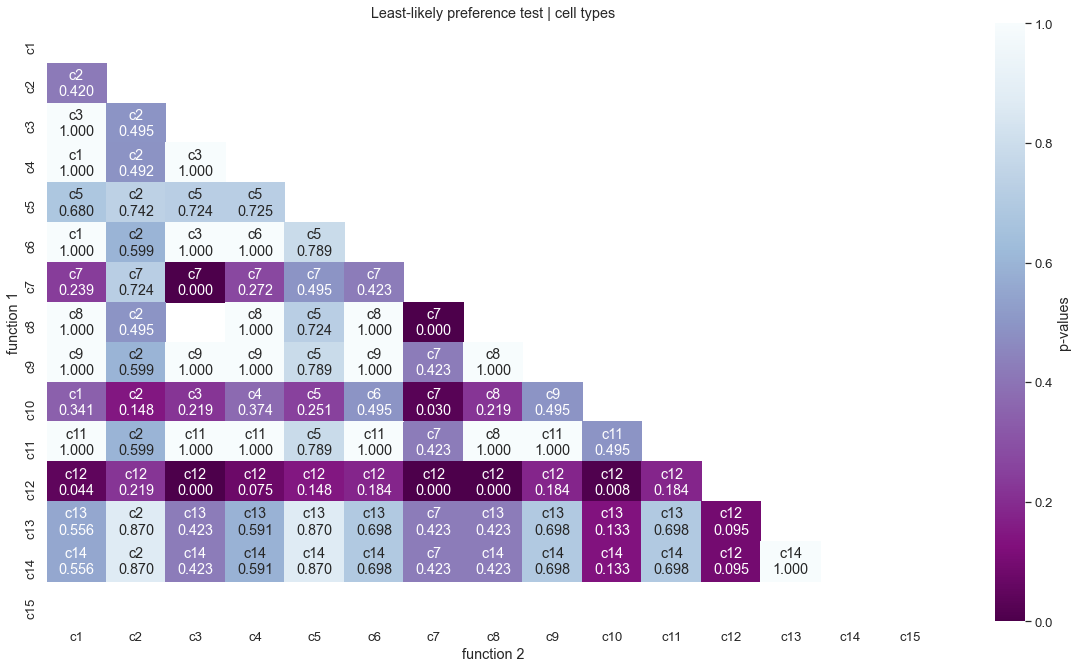

In [379]:
create_heatmap(domain_least_likely_dfs['Cell types'], 
               'Least-likely preference test | cell types', 'cell_types_least_likely')

In [380]:
domain_least_likely_dfs['Cell types']

function 1 function 2 winner     p-val   groupings
0           c5         c4     c5  0.724659  Cell types
1           c4         c2     c2  0.491767  Cell types
2           c6         c4     c6  1.000000  Cell types
3          c12         c4    c12  0.074840  Cell types
4          c13         c4    c13  0.590801  Cell types
5           c4         c1     c1  1.000000  Cell types
6           c4         c3     c3  1.000000  Cell types
7           c7         c4     c7  0.272228  Cell types
8           c9         c4     c9  1.000000  Cell types
9          c11         c4    c11  1.000000  Cell types
10         c14         c4    c14  0.590801  Cell types
11         c10         c4     c4  0.373901  Cell types
12          c8         c4     c8  1.000000  Cell types
13         c15         c4    c15       NaN  Cell types
14          c5         c2     c2  0.741521  Cell types
15          c6         c5     c5  0.788780  Cell types
16         c12         c5    c12  0.148220  Cell types
17         c13         c5    c13  0.870276  Cell types
18          c5         c1     c5  0.680138  Cell types
19          c5         c3     c5  0.724377  Cell types
20          c7         c5     c7  0.495025  Cell types
21          c9         c5     c5  0.788780  Cell types
22         c11         c5     c5  0.788780  Cell types
23         c14         c5    c14  0.870276  Cell types
24         c10         c5     c5  0.250815  Cell types
25          c8         c5     c5  0.724377  Cell types
26         c15         c5     c5       NaN  Cell types
27          c6         c2     c2  0.599319  Cell types
28         c12         c2    c12  0.219102  Cell types
29         c13         c2     c2  0.870276  Cell types
30          c2         c1     c2  0.419753  Cell types
31          c3         c2     c2  0.495025  Cell types
32          c7         c2     c7  0.724377  Cell types
33          c9         c2     c2  0.599319  Cell types
34         c11         c2     c2  0.599319  Cell types
35         c14         c2     c2  0.870276  Cell types
36         c10         c2     c2  0.148148  Cell types
37          c8         c2     c2  0.495025  Cell types
38         c15         c2     c2       NaN  Cell types
39         c12         c6    c12  0.183503  Cell types
40         c13         c6    c13  0.698489  Cell types
41          c6         c1     c1  1.000000  Cell types
42          c6         c3     c3  1.000000  Cell types
43          c7         c6     c7  0.422650  Cell types
44          c9         c6     c9  1.000000  Cell types
45         c11         c6    c11  1.000000  Cell types
46         c14         c6    c14  0.698489  Cell types
47         c10         c6     c6  0.495025  Cell types
48          c8         c6     c8  1.000000  Cell types
49         c15         c6    c15       NaN  Cell types
50         c13        c12    c12  0.095466  Cell types
51         c12         c1    c12  0.044210  Cell types
52         c12         c3    c12  0.000000  Cell types
53         c12         c7    c12  0.000000  Cell types
54         c12         c9    c12  0.183503  Cell types
55         c12        c11    c12  0.183503  Cell types
56         c14        c12    c12  0.095466  Cell types
57         c12        c10    c12  0.008466  Cell types
58         c12         c8    c12  0.000000  Cell types
59         c15        c12    c12       NaN  Cell types
60         c13         c1    c13  0.556395  Cell types
61         c13         c3    c13  0.422650  Cell types
62         c13         c7     c7  0.422650  Cell types
63         c13         c9    c13  0.698489  Cell types
64         c13        c11    c13  0.698489  Cell types
65         c14        c13    c14  1.000000  Cell types
66         c13        c10    c13  0.132842  Cell types
67         c13         c8    c13  0.422650  Cell types
68         c15        c13    c13       NaN  Cell types
69          c3         c1     c3  1.000000  Cell types
70          c7         c1     c7  0.239034  Cell types
71          c9         c1     c9  1.000000  

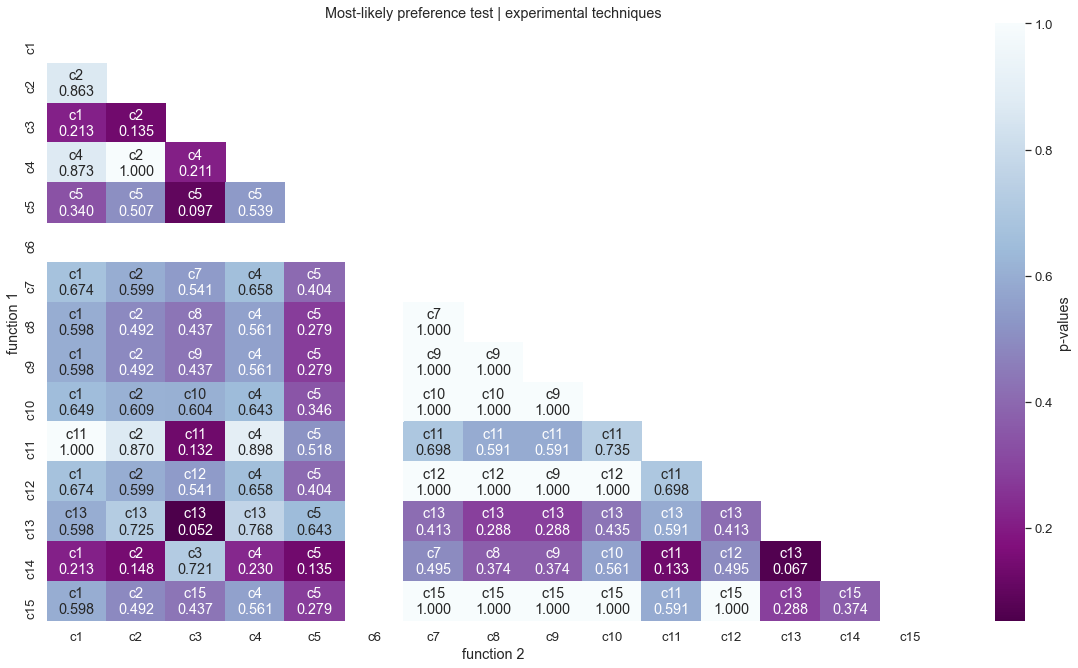

In [381]:
create_heatmap(domain_most_likely_dfs['Experimental techniques'], 
               'Most-likely preference test | experimental techniques', 'experimental_techniques_most_likely')

In [382]:
domain_most_likely_dfs['Experimental techniques']

function 1 function 2 winner     p-val                groupings
0           c4         c1     c4  0.873090  Experimental techniques
1           c8         c1     c1  0.598331  Experimental techniques
2           c5         c1     c5  0.339838  Experimental techniques
3           c7         c1     c1  0.673752  Experimental techniques
4          c10         c1     c1  0.649120  Experimental techniques
5          c12         c1     c1  0.673752  Experimental techniques
6          c13         c1    c13  0.598331  Experimental techniques
7           c2         c1     c2  0.863172  Experimental techniques
8           c9         c1     c1  0.598331  Experimental techniques
9          c15         c1     c1  0.598331  Experimental techniques
10         c11         c1    c11  1.000000  Experimental techniques
11          c3         c1     c1  0.213278  Experimental techniques
12          c6         c1     c1       NaN  Experimental techniques
13         c14         c1     c1  0.213290  Experimental techniques
14          c8         c4     c4  0.561438  Experimental techniques
15          c5         c4     c5  0.539080  Experimental techniques
16          c7         c4     c4  0.657795  Experimental techniques
17         c10         c4     c4  0.643330  Experimental techniques
18         c12         c4     c4  0.657795  Experimental techniques
19         c13         c4    c13  0.767644  Experimental techniques
20          c4         c2     c2  1.000000  Experimental techniques
21          c9         c4     c4  0.561438  Experimental techniques
22         c15         c4     c4  0.561438  Experimental techniques
23         c11         c4     c4  0.898168  Experimental techniques
24          c4         c3     c4  0.210796  Experimental techniques
25          c6         c4     c4       NaN  Experimental techniques
26         c14         c4     c4  0.230200  Experimental techniques
27          c8         c5     c5  0.279440  Experimental techniques
28          c8         c7     c7  1.000000  Experimental techniques
29         c10         c8    c10  1.000000  Experimental techniques
30         c12         c8    c12  1.000000  Experimental techniques
31         c13         c8    c13  0.287864  Experimental techniques
32          c8         c2     c2  0.491767  Experimental techniques
33          c9         c8     c9  1.000000  Experimental techniques
34         c15         c8    c15  1.000000  Experimental techniques
35         c11         c8    c11  0.590801  Experimental techniques
36          c8         c3     c8  0.436588  Experimental techniques
37          c8         c6     c8       NaN  Experimental techniques
38         c14         c8     c8  0.373901  Experimental techniques
39          c7         c5     c5  0.404342  Experimental techniques
40         c10         c5     c5  0.346490  Experimental techniques
41         c12         c5     c5  0.404342  Experimental techniques
42         c13         c5     c5  0.643330  Experimental techniques
43          c5         c2     c5  0.507158  Experimental techniques
44          c9         c5     c5  0.279440  Experimental techniques
45         c15         c5     c5  0.279440  Experimental techniques
46         c11         c5     c5  0.517632  Experimental techniques
47          c5         c3     c5  0.096840  Experimental techniques
48          c6         c5     c5       NaN  Experimental techniques
49         c14         c5     c5  0.134702  Experimental techniques
50         c10         c7    c10  1.000000  Experimental techniques
51         c12         c7    c12  1.000000  Experimental techniques
52         c13         c7    c13  0.412770  Experimental techniques
53          c7         c2     c2  0.599319  Experimental techniques
54          c9         c7     c9  1.000000  Experimental techniques
55         c15         c7    c15  1.000000  Experimental techniques
56         c11         c7    c11  0.698489  Experimental techniques
57          c7         c3     c7  0.541470  Experimental tec

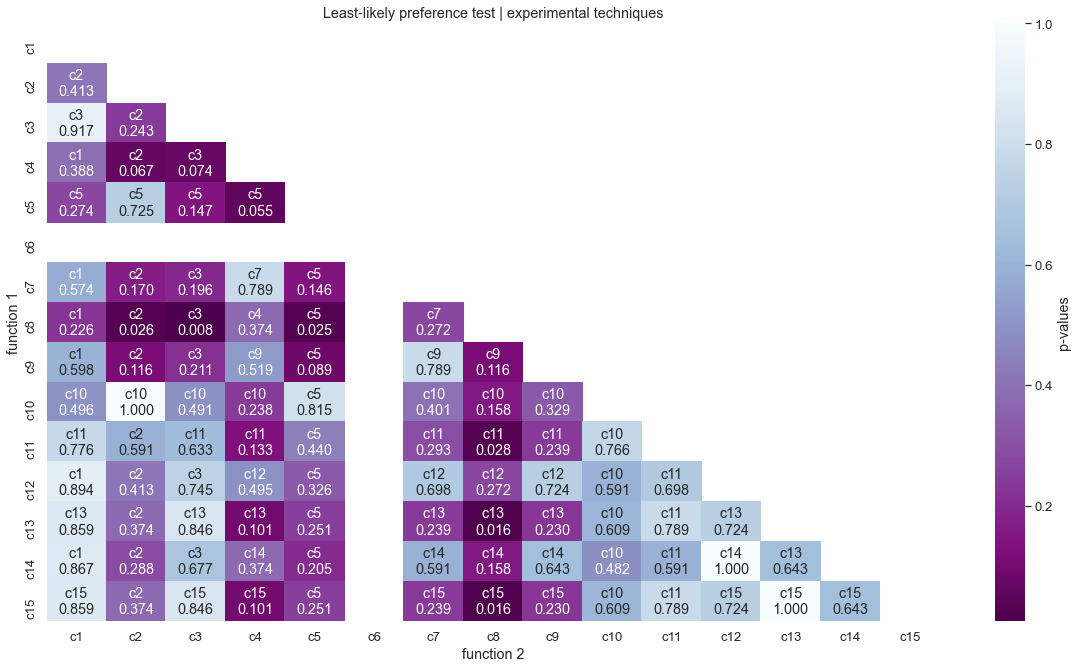

In [383]:
create_heatmap(domain_least_likely_dfs['Experimental techniques'], 
               'Least-likely preference test | experimental techniques', 'experimental_techniques_least_likely')

In [384]:
domain_least_likely_dfs['Experimental techniques']

function 1 function 2 winner     p-val                groupings
0           c5         c1     c5  0.273546  Experimental techniques
1           c5         c2     c5  0.724659  Experimental techniques
2          c10         c5     c5  0.814902  Experimental techniques
3           c6         c5     c6       NaN  Experimental techniques
4           c5         c3     c5  0.146839  Experimental techniques
5          c11         c5     c5  0.439710  Experimental techniques
6          c12         c5     c5  0.326121  Experimental techniques
7          c13         c5     c5  0.250815  Experimental techniques
8           c7         c5     c5  0.145596  Experimental techniques
9          c14         c5     c5  0.205106  Experimental techniques
10         c15         c5     c5  0.250815  Experimental techniques
11          c5         c4     c5  0.055041  Experimental techniques
12          c9         c5     c5  0.089009  Experimental techniques
13          c8         c5     c5  0.024896  Experimental techniques
14          c2         c1     c2  0.412938  Experimental techniques
15         c10         c1    c10  0.495733  Experimental techniques
16          c6         c1     c6       NaN  Experimental techniques
17          c3         c1     c3  0.917202  Experimental techniques
18         c11         c1    c11  0.776448  Experimental techniques
19         c12         c1     c1  0.893565  Experimental techniques
20         c13         c1    c13  0.859311  Experimental techniques
21          c7         c1     c1  0.574154  Experimental techniques
22         c14         c1     c1  0.866732  Experimental techniques
23         c15         c1    c15  0.859311  Experimental techniques
24          c4         c1     c1  0.388440  Experimental techniques
25          c9         c1     c1  0.598331  Experimental techniques
26          c8         c1     c1  0.226387  Experimental techniques
27         c10         c2    c10  1.000000  Experimental techniques
28          c6         c2     c6       NaN  Experimental techniques
29          c3         c2     c2  0.242768  Experimental techniques
30         c11         c2     c2  0.590801  Experimental techniques
31         c12         c2     c2  0.412770  Experimental techniques
32         c13         c2     c2  0.373901  Experimental techniques
33          c7         c2     c2  0.169680  Experimental techniques
34         c14         c2     c2  0.287864  Experimental techniques
35         c15         c2     c2  0.373901  Experimental techniques
36          c4         c2     c2  0.066767  Experimental techniques
37          c9         c2     c2  0.116117  Experimental techniques
38          c8         c2     c2  0.025721  Experimental techniques
39         c10         c6     c6       NaN  Experimental techniques
40         c10         c3    c10  0.491279  Experimental techniques
41         c11        c10    c10  0.766255  Experimental techniques
42         c12        c10    c10  0.590801  Experimental techniques
43         c13        c10    c10  0.608653  Experimental techniques
44         c10         c7    c10  0.400966  Experimental techniques
45         c14        c10    c10  0.481817  Experimental techniques
46         c15        c10    c10  0.608653  Experimental techniques
47         c10         c4    c10  0.237796  Experimental techniques
48         c10         c9    c10  0.329460  Experimental techniques
49         c10         c8    c10  0.158302  Experimental techniques
50          c6         c3     c6       NaN  Experimental techniques
51         c11         c6     c6       NaN  Experimental techniques
52         c12         c6     c6       NaN  Experimental techniques
53         c13         c6     c6       NaN  Experimental techniques
54          c7         c6     c6       NaN  Experimental techniques
55         c14         c6     c6       NaN  Experimental techniques
56         c15         c6     c6       NaN  Experimental techniques
57          c6         c4     c6       NaN  Experimental tec

In [385]:
most_likely

function 1 function 2 winner     p-val
0           c3         c1     c1  0.001918
1           c2         c1     c1  0.023891
2           c4         c1     c1  0.035601
3          c11         c1     c1  0.844133
4          c10         c1     c1  0.043124
5           c8         c1     c1  0.915534
6           c7         c1     c1  0.053328
7           c5         c1     c1  0.030414
8           c9         c1     c1  0.040346
9           c6         c1     c1  0.667658
10         c13         c1     c1  0.439199
11         c12         c1     c1  0.003327
12         c15         c1     c1  0.013862
13         c14         c1     c1  0.013480
14          c3         c2     c2  0.242980
15          c4         c3     c4  0.256452
16         c11         c3    c11  0.013691
17         c10         c3    c10  0.363979
18          c8         c3     c8  0.012872
19          c7         c3     c7  0.422087
20          c5         c3     c5  0.542931
21          c9         c3     c9  0.298116
22          c6         c3     c6  0.043842
23         c13         c3    c13  0.025325
24         c12         c3     c3  0.891446
25         c15         c3    c15  0.549629
26         c14         c3    c14  0.405126
27          c4         c2     c4  0.996661
28         c11         c2    c11  0.096627
29         c10         c2     c2  0.925903
30          c8         c2     c8  0.083604
31          c7         c2     c2  0.879105
32          c5         c2     c2  0.734319
33          c9         c2     c2  0.951068
34          c6         c2     c6  0.222390
35         c13         c2    c13  0.209765
36         c12         c2     c2  0.230010
37         c15         c2     c2  0.581066
38         c14         c2     c2  0.673864
39         c11         c4    c11  0.113343
40         c10         c4     c4  0.926637
41          c8         c4     c8  0.101946
42          c7         c4     c4  0.881365
43          c5         c4     c4  0.745708
44          c9         c4     c4  0.949429
45          c6         c4     c6  0.237888
46         c13         c4    c13  0.226209
47         c12         c4     c4  0.242135
48         c15         c4     c4  0.584899
49         c14         c4     c4  0.673600
50         c11        c10    c11  0.136696
51         c11         c8     c8  0.940859
52         c11         c7    c11  0.146566
53         c11         c5    c11  0.112403
54         c11         c9    c11  0.115341
55         c11         c6    c11  0.824114
56         c13        c11    c11  0.630737
57         c12        c11    c11  0.018738
58         c15        c11    c11  0.047547
59         c14        c11    c11  0.044240
60         c10         c8     c8  0.121859
61         c10         c7    c10  0.956137
62         c10         c5    c10  0.829821
63         c10         c9     c9  0.973853
64         c10         c6     c6  0.270473
65         c13        c10    c13  0.250630
66         c12        c10    c10  0.345788
67         c15        c10    c10  0.701668
68         c14        c10    c10  0.791414
69          c8         c7     c8  0.134242
70          c8         c5     c8  0.099352
71          c9         c8     c8  0.106356
72          c8         c6     c8  0.778124
73         c13         c8     c8  0.582648
74         c12         c8     c8  0.018132
75         c15         c8     c8  0.046205
76         c14         c8     c8  0.043545
77          c7         c5     c7  0.881026
78          c9         c7     c9  0.927454
79          c7         c6     c6  0.273747
80         c13         c7    c13  0.250445
81         c12         c7     c7  0.398988
82         c15         c7     c7  0.758849
83         c14         c7     c7  0.850136
84          c9         c5     c9  0.795987
85          c6         c5     c6  0.231788
86         c13         c5    c13  0.199245
87         c12         c5     c5  0.508457
88         c15         c5     c5  0.902410
89         c14         c5    c14  0.995414
90          c9         c6     c6  0.231988
91         c13         c9    c13  0.217229
92   

In [386]:
most_likely['winner'].value_counts()

c1     14
c8     13
c11    12
c6     11
c13    10
c4      9
c2      8
c9      7
c10     6
c7      5
c14     4
c5      3
c15     2
c3      1
Name: winner, dtype: int64

In [387]:
most_likely.loc[most_likely['p-val'] < 0.05]['winner'].value_counts()

c1     9
c8     4
c11    4
c13    2
c6     1
Name: winner, dtype: int64

In [388]:
least_likely['winner'].value_counts()

c5     14
c4     13
c6     12
c15    11
c1     10
c11     9
c10     8
c9      7
c12     6
c14     5
c2      4
c3      3
c7      2
c13     1
Name: winner, dtype: int64

In [389]:
least_likely.loc[least_likely['p-val'] < 0.05]['winner'].value_counts()

c5    6
c4    1
Name: winner, dtype: int64

In [390]:
scope_most_likely_dfs['very broad']['winner'].value_counts()

c1     14
c11    13
c8     12
c6     11
c13    10
c9      9
c15     8
c10     7
c14     6
c7      5
c4      4
c2      3
c5      2
c3      1
Name: winner, dtype: int64

In [391]:
scope_most_likely_dfs['very broad'].loc[scope_most_likely_dfs['very broad']['p-val'] < 0.05]['winner'].value_counts()

c1     10
c8      5
c11     4
c6      1
c13     1
Name: winner, dtype: int64

In [392]:
scope_least_likely_dfs['very broad']['winner'].value_counts()

c5     14
c4     13
c10    12
c9     11
c1     10
c14     9
c3      8
c11     7
c8      6
c12     5
c6      4
c2      3
c13     2
c7      1
Name: winner, dtype: int64

In [393]:
scope_least_likely_dfs['very broad'].loc[scope_least_likely_dfs['very broad']['p-val'] < 0.05]['winner'].value_counts()

c4    2
c5    2
Name: winner, dtype: int64

In [394]:
scope_most_likely_dfs['broad']['winner'].value_counts()

c11    14
c10    13
c6     12
c8     11
c13    10
c4      9
c1      8
c5      7
c15     6
c14     5
c3      4
c2      3
c7      2
c12     1
Name: winner, dtype: int64

In [395]:
scope_most_likely_dfs['broad'].loc[scope_most_likely_dfs['broad']['p-val'] < 0.05]['winner'].value_counts()

c11    4
c4     2
c13    2
c6     1
Name: winner, dtype: int64

In [396]:
scope_least_likely_dfs['broad']['winner'].value_counts()

c12    14
c6     13
c7     12
c5     11
c1     10
c2      9
c9      8
c4      7
c3      6
c15     5
c13     4
c10     3
c14     2
c11     1
Name: winner, dtype: int64

In [397]:
scope_least_likely_dfs['broad'].loc[scope_least_likely_dfs['broad']['p-val'] < 0.05]['winner'].value_counts()

c5    1
c2    1
c9    1
Name: winner, dtype: int64

In [398]:
scope_most_likely_dfs['somewhat specific']['winner'].value_counts()

c12    14
c7     13
c9     12
c8     11
c13    10
c2      9
c4      8
c1      7
c3      6
c14     5
c15     4
c11     3
c10     2
c5      1
Name: winner, dtype: int64

In [399]:
scope_most_likely_dfs['somewhat specific'].loc[scope_most_likely_dfs['somewhat specific']['p-val'] < 0.05]['winner'].value_counts()

c8     3
c9     3
c7     2
c12    2
c2     2
Name: winner, dtype: int64

In [400]:
scope_least_likely_dfs['somewhat specific']['winner'].value_counts()

c12    14
c5     13
c6     12
c15    11
c4     10
c7      9
c2      8
c14     7
c11     6
c13     5
c10     4
c8      3
c1      2
c3      1
Name: winner, dtype: int64

In [401]:
scope_least_likely_dfs['somewhat specific'].loc[scope_least_likely_dfs['somewhat specific']['p-val'] < 0.05]['winner'].value_counts()

c15    4
c12    4
c5     2
c14    2
c7     2
c2     1
Name: winner, dtype: int64

In [402]:
scope_most_likely_dfs['very specific']['winner'].value_counts()

c7     14
c2     13
c5     12
c1     11
c12    10
c13     9
c11     8
c9      7
c6      6
c10     5
c14     4
c15     3
c8      2
c4      1
Name: winner, dtype: int64

In [403]:
scope_most_likely_dfs['very specific'].loc[scope_most_likely_dfs['very specific']['p-val'] < 0.05]['winner'].value_counts()

Series([], Name: winner, dtype: int64)

In [404]:
scope_least_likely_dfs['very specific']['winner'].value_counts()

c11    14
c15    13
c9     12
c5     11
c4     10
c6      9
c10     8
c1      7
c13     6
c3      5
c14     4
c7      3
c2      2
c8      1
Name: winner, dtype: int64

In [405]:
scope_least_likely_dfs['very specific'].loc[scope_least_likely_dfs['very specific']['p-val'] < 0.05]['winner'].value_counts()

c5     3
c9     3
c10    2
c3     1
Name: winner, dtype: int64

In [406]:
domains

array(['Infectious Disease', 'Allergy', 'Immunology',
       'General Biomedical', 'Cell types', 'Experimental techniques'],
      dtype=object)

In [407]:
domain_most_likely_dfs['Allergy']['winner'].value_counts()

c5     14
c10    13
c1     12
c4     11
c6     10
c9      9
c14     8
c15     7
c8      6
c12     5
c13     4
c3      3
c11     2
c2      1
Name: winner, dtype: int64

In [408]:
domain_most_likely_dfs['Allergy'].loc[domain_most_likely_dfs['Allergy']['p-val'] < 0.05]['winner'].value_counts()

c4     2
c14    2
c6     1
c5     1
Name: winner, dtype: int64

In [409]:
domain_least_likely_dfs['Allergy']['winner'].value_counts()

c6     14
c1     13
c11    12
c5     11
c10    10
c4      9
c8      8
c14     7
c3      6
c15     5
c2      4
c9      3
c12     2
c13     1
Name: winner, dtype: int64

In [410]:
domain_least_likely_dfs['Allergy'].loc[domain_least_likely_dfs['Allergy']['p-val'] < 0.05]['winner'].value_counts()

c6     7
c10    2
Name: winner, dtype: int64

In [411]:
domain_most_likely_dfs['Cell types']['winner'].value_counts()

c9     14
c6     13
c1     12
c14    11
c11    10
c13     9
c7      8
c2      7
c10     6
c8      5
c5      4
c4      3
c12     2
c15     1
Name: winner, dtype: int64

In [412]:
domain_most_likely_dfs['Cell types'].loc[domain_most_likely_dfs['Cell types']['p-val'] < 0.05]['winner'].value_counts()

Series([], Name: winner, dtype: int64)

In [413]:
domain_least_likely_dfs['Cell types']['winner'].value_counts()

c12    14
c7     13
c2     12
c14    11
c13    10
c5      9
c15     8
c8      7
c11     6
c9      5
c3      4
c1      3
c6      2
c4      1
Name: winner, dtype: int64

In [414]:
domain_least_likely_dfs['Cell types'].loc[domain_least_likely_dfs['Cell types']['p-val'] < 0.05]['winner'].value_counts()

c12    5
c7     3
Name: winner, dtype: int64

In [415]:
domain_most_likely_dfs['Experimental techniques']['winner'].value_counts()

c5     14
c13    13
c2     12
c4     11
c11    10
c1      9
c15     8
c9      7
c12     6
c10     5
c7      4
c8      3
c3      2
c14     1
Name: winner, dtype: int64

In [416]:
domain_most_likely_dfs['Experimental techniques'].loc[domain_most_likely_dfs['Experimental techniques']['p-val'] < 0.05]['winner'].value_counts()

Series([], Name: winner, dtype: int64)

In [417]:
domain_least_likely_dfs['Experimental techniques']['winner'].value_counts()

c6     14
c5     13
c10    12
c2     11
c11    10
c15     9
c13     8
c3      7
c1      6
c14     5
c12     4
c9      3
c7      2
c4      1
Name: winner, dtype: int64

In [418]:
domain_least_likely_dfs['Experimental techniques'].loc[domain_least_likely_dfs['Experimental techniques']['p-val'] < 0.05]['winner'].value_counts()

c11    1
c15    1
c2     1
c13    1
c5     1
c3     1
Name: winner, dtype: int64

In [419]:
domain_most_likely_dfs['General Biomedical']['winner'].value_counts()

c11    14
c6     13
c1     12
c13    11
c7     10
c14     9
c8      8
c3      7
c4      6
c9      5
c2      4
c10     3
c12     2
c15     1
Name: winner, dtype: int64

In [420]:
domain_most_likely_dfs['General Biomedical'].loc[domain_most_likely_dfs['General Biomedical']['p-val'] < 0.05]['winner'].value_counts()

c11    2
c6     2
c1     2
Name: winner, dtype: int64

In [421]:
domain_least_likely_dfs['General Biomedical']['winner'].value_counts()

c5     14
c4     13
c12    12
c14    11
c7     10
c9      9
c3      8
c2      7
c15     6
c8      5
c1      4
c13     3
c10     2
c6      1
Name: winner, dtype: int64

In [422]:
domain_least_likely_dfs['General Biomedical'].loc[domain_least_likely_dfs['General Biomedical']['p-val'] < 0.05]['winner'].value_counts()

c5     8
c4     2
c15    1
c14    1
c2     1
Name: winner, dtype: int64

In [423]:
domain_most_likely_dfs['Immunology']['winner'].value_counts()

c11    14
c8     13
c7     12
c6     11
c2     10
c13     9
c15     8
c4      7
c1      6
c12     5
c14     4
c3      3
c9      2
c10     1
Name: winner, dtype: int64

In [424]:
domain_most_likely_dfs['Immunology'].loc[domain_most_likely_dfs['Immunology']['p-val'] < 0.05]['winner'].value_counts()

c12    2
c1     2
Name: winner, dtype: int64

In [425]:
domain_least_likely_dfs['Immunology']['winner'].value_counts()

c10    14
c4     13
c15    12
c9     11
c1     10
c14     9
c5      8
c3      7
c6      6
c7      5
c13     4
c8      3
c2      2
c12     1
Name: winner, dtype: int64

In [426]:
domain_least_likely_dfs['Immunology'].loc[domain_least_likely_dfs['Immunology']['p-val'] < 0.05]['winner'].value_counts()

c10    4
Name: winner, dtype: int64

In [427]:
domain_most_likely_dfs['Infectious Disease']['winner'].value_counts()

c8     14
c1     13
c11    12
c13    11
c10    10
c15     9
c7      8
c2      7
c6      6
c14     5
c9      4
c3      3
c12     2
c4      1
Name: winner, dtype: int64

In [428]:
domain_most_likely_dfs['Infectious Disease'].loc[domain_most_likely_dfs['Infectious Disease']['p-val'] < 0.05]['winner'].value_counts()

c8     11
c1      3
c13     2
Name: winner, dtype: int64

In [429]:
domain_least_likely_dfs['Infectious Disease']['winner'].value_counts()

c4     14
c5     13
c11    12
c15    11
c9     10
c13     9
c7      8
c1      7
c12     6
c10     5
c2      4
c3      3
c14     2
c8      1
Name: winner, dtype: int64

In [430]:
domain_least_likely_dfs['Infectious Disease'].loc[domain_least_likely_dfs['Infectious Disease']['p-val'] < 0.05]['winner'].value_counts()

c4    2
Name: winner, dtype: int64